In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

excel_file = 'EU_disasters.xlsx'

df = pd.read_excel(excel_file)

df.drop(columns=['Historic', 'Classification Key','External IDs', 'Event Name','OFDA/BHA Response','Appeal','Declaration',"AID Contribution ('000 US$)", 'Magnitude','Magnitude Scale', 'Latitude','Longitude','River Basin','Start Day','Total Deaths','No. Injured','No. Affected','No. Homeless','Total Affected',"Reconstruction Costs ('000 US$)", 
                 "Reconstruction Costs, Adjusted ('000 US$)","Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)","Total Damage, Adjusted ('000 US$)",'CPI', "Admin Units","Entry Date", 'Last Update','Origin','Associated Types'], inplace=True)

print(df.head()) 

# columns_to_convert = ['Start Year', 'Start Month', 'End Year', 'End Month']
# df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric)

df['Start Year'] = pd.to_datetime(df['Start Year'], format='%Y').dt.year


generic_colors = ['red', 'yellow', 'purple', 'blue', 'green', 'black', 'gray', 'pink', 'brown',
                  'skyblue', 'darkorange', 'lightseagreen', 'cyan', 'magenta', 'lime', 'gold',
                  'indigo', 'teal', 'salmon', 'peru', 'olive', 'orchid', 'steelblue','black']


          DisNo. Disaster Group       Disaster Subgroup  \
0  2000-0024-NOR  Technological               Transport   
1  2000-0028-ROU        Natural          Meteorological   
2  2000-0029-BGR        Natural          Meteorological   
3  2000-0032-CHE  Technological               Transport   
4  2000-0039-ESP  Technological  Miscellaneous accident   

              Disaster Type          Disaster Subtype  ISO      Country  \
0                      Rail                      Rail  NOR       Norway   
1                     Storm     Blizzard/Winter storm  ROU      Romania   
2       Extreme temperature                 Cold wave  BGR     Bulgaria   
3                       Air                       Air  CHE  Switzerland   
4  Collapse (Miscellaneous)  Collapse (Miscellaneous)  ESP        Spain   

         Subregion  Region                                        Location  \
0  Northern Europe  Europe                                 Aasta (Hedmark)   
1   Eastern Europe  Europe  Bihor, Sat

In [104]:
filter_natural = df[df['Disaster Group'] == 'Natural']

grouped_natural_disaster = filter_natural.groupby('Disaster Group')

grouped_natural_disaster.head()

,DisNo.,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Location,Start Year,Start Month,End Year,End Month,End Day
1,2000-0028-ROU,Natural,Meteorological,Storm,Blizzard/Winter storm,ROU,Romania,Eastern Europe,Europe,"Bihor, Satu Mare, Cluj, Salaj, Mures provinces",2000,1.0,2000,1.0,NaN
2,2000-0029-BGR,Natural,Meteorological,Extreme temperature,Cold wave,BGR,Bulgaria,Eastern Europe,Europe,"Sofia province, Sofia-city province",2000,1.0,2000,1.0,NaN
7,2000-0052-RUS,Natural,Biological,Epidemic,Viral disease,RUS,Russian Federation,Eastern Europe,Europe,Tatarstan,2000,1.0,2000,1.0,NaN
9,2000-0072-BIH,Natural,Hydrological,Mass movement (wet),Landslide (wet),BIH,Bosnia and Herzegovina,Southern Europe,Europe,"Velika Broda (Zenicko-dobojski district, Feder...",2000,2.0,2000,2.0,10.0
10,2000-0076-ISL,Natural,Geophysical,Earthquake,Ground movement,ISL,Iceland,Northern Europe,Europe,"Grimsnes, Selfoss, Eyrarbakki, Stokkseyri city...",2000,6.0,2000,6.0,21.0


In [105]:
natural_disaster_group = grouped_natural_disaster.get_group('Natural')
print(natural_disaster_group)

for group_name, group_data in grouped_natural_disaster:
    print("Group:", group_name)
    print(group_data)


             DisNo. Disaster Group  Disaster Subgroup  \
1     2000-0028-ROU        Natural     Meteorological   
2     2000-0029-BGR        Natural     Meteorological   
7     2000-0052-RUS        Natural         Biological   
9     2000-0072-BIH        Natural       Hydrological   
10    2000-0076-ISL        Natural        Geophysical   
14    2000-0155-AUT        Natural       Hydrological   
15    2000-0164-RUS        Natural       Hydrological   
16    2000-0165-RUS        Natural     Meteorological   
17    2000-0167-CZE        Natural       Hydrological   
18    2000-0167-ROU        Natural       Hydrological   
20    2000-0179-RUS        Natural       Hydrological   
22    2000-0187-ROU        Natural       Hydrological   
23    2000-0191-HUN        Natural       Hydrological   
24    2000-0196-SCG        Natural       Hydrological   
25    2000-0202-RUS        Natural       Hydrological   
26    2000-0218-RUS        Natural     Climatological   
27    2000-0231-RUS        Natu

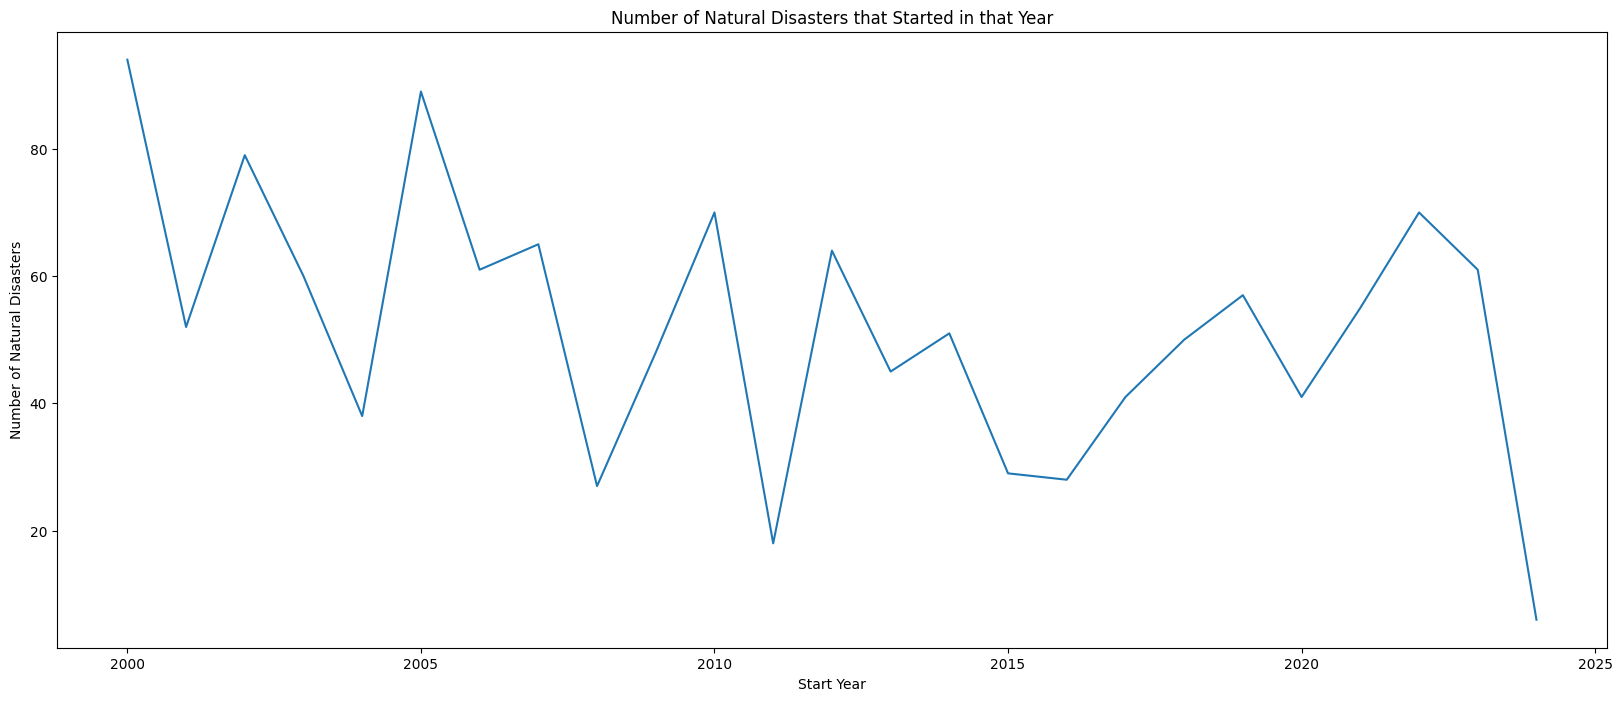

In [106]:
grouped_start_year = filter_natural.groupby('Start Year').size()

plt.figure(figsize=(20, 8))

plt.plot(grouped_start_year.index, grouped_start_year.values)

plt.xlabel('Start Year')
plt.ylabel('Number of Natural Disasters')
plt.title('Number of Natural Disasters that Started in that Year')

plt.show()


<Figure size 3000x800 with 0 Axes>

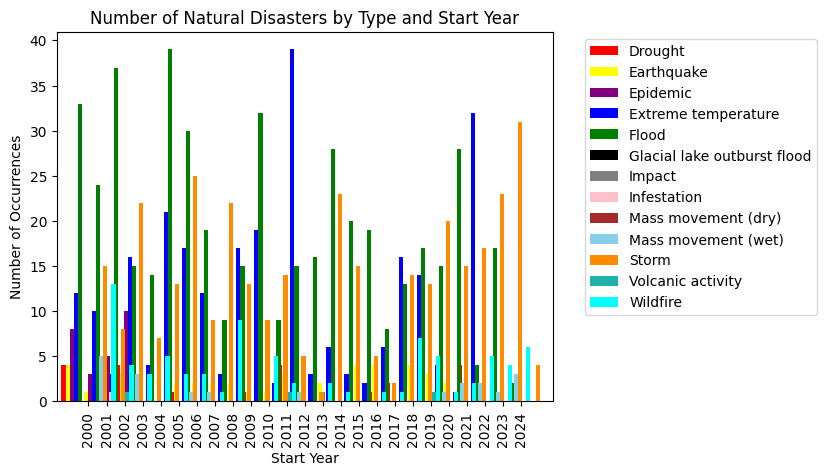

In [107]:
grouped = filter_natural.groupby(['Start Year', 'Disaster Type']).size().unstack(fill_value=0)

plt.figure(figsize=(30, 8))
grouped.plot(kind='bar', stacked=False, width =3, color = generic_colors)
plt.xlabel('Start Year')
plt.ylabel('Number of Occurrences')
plt.title('Number of Natural Disasters by Type and Start Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


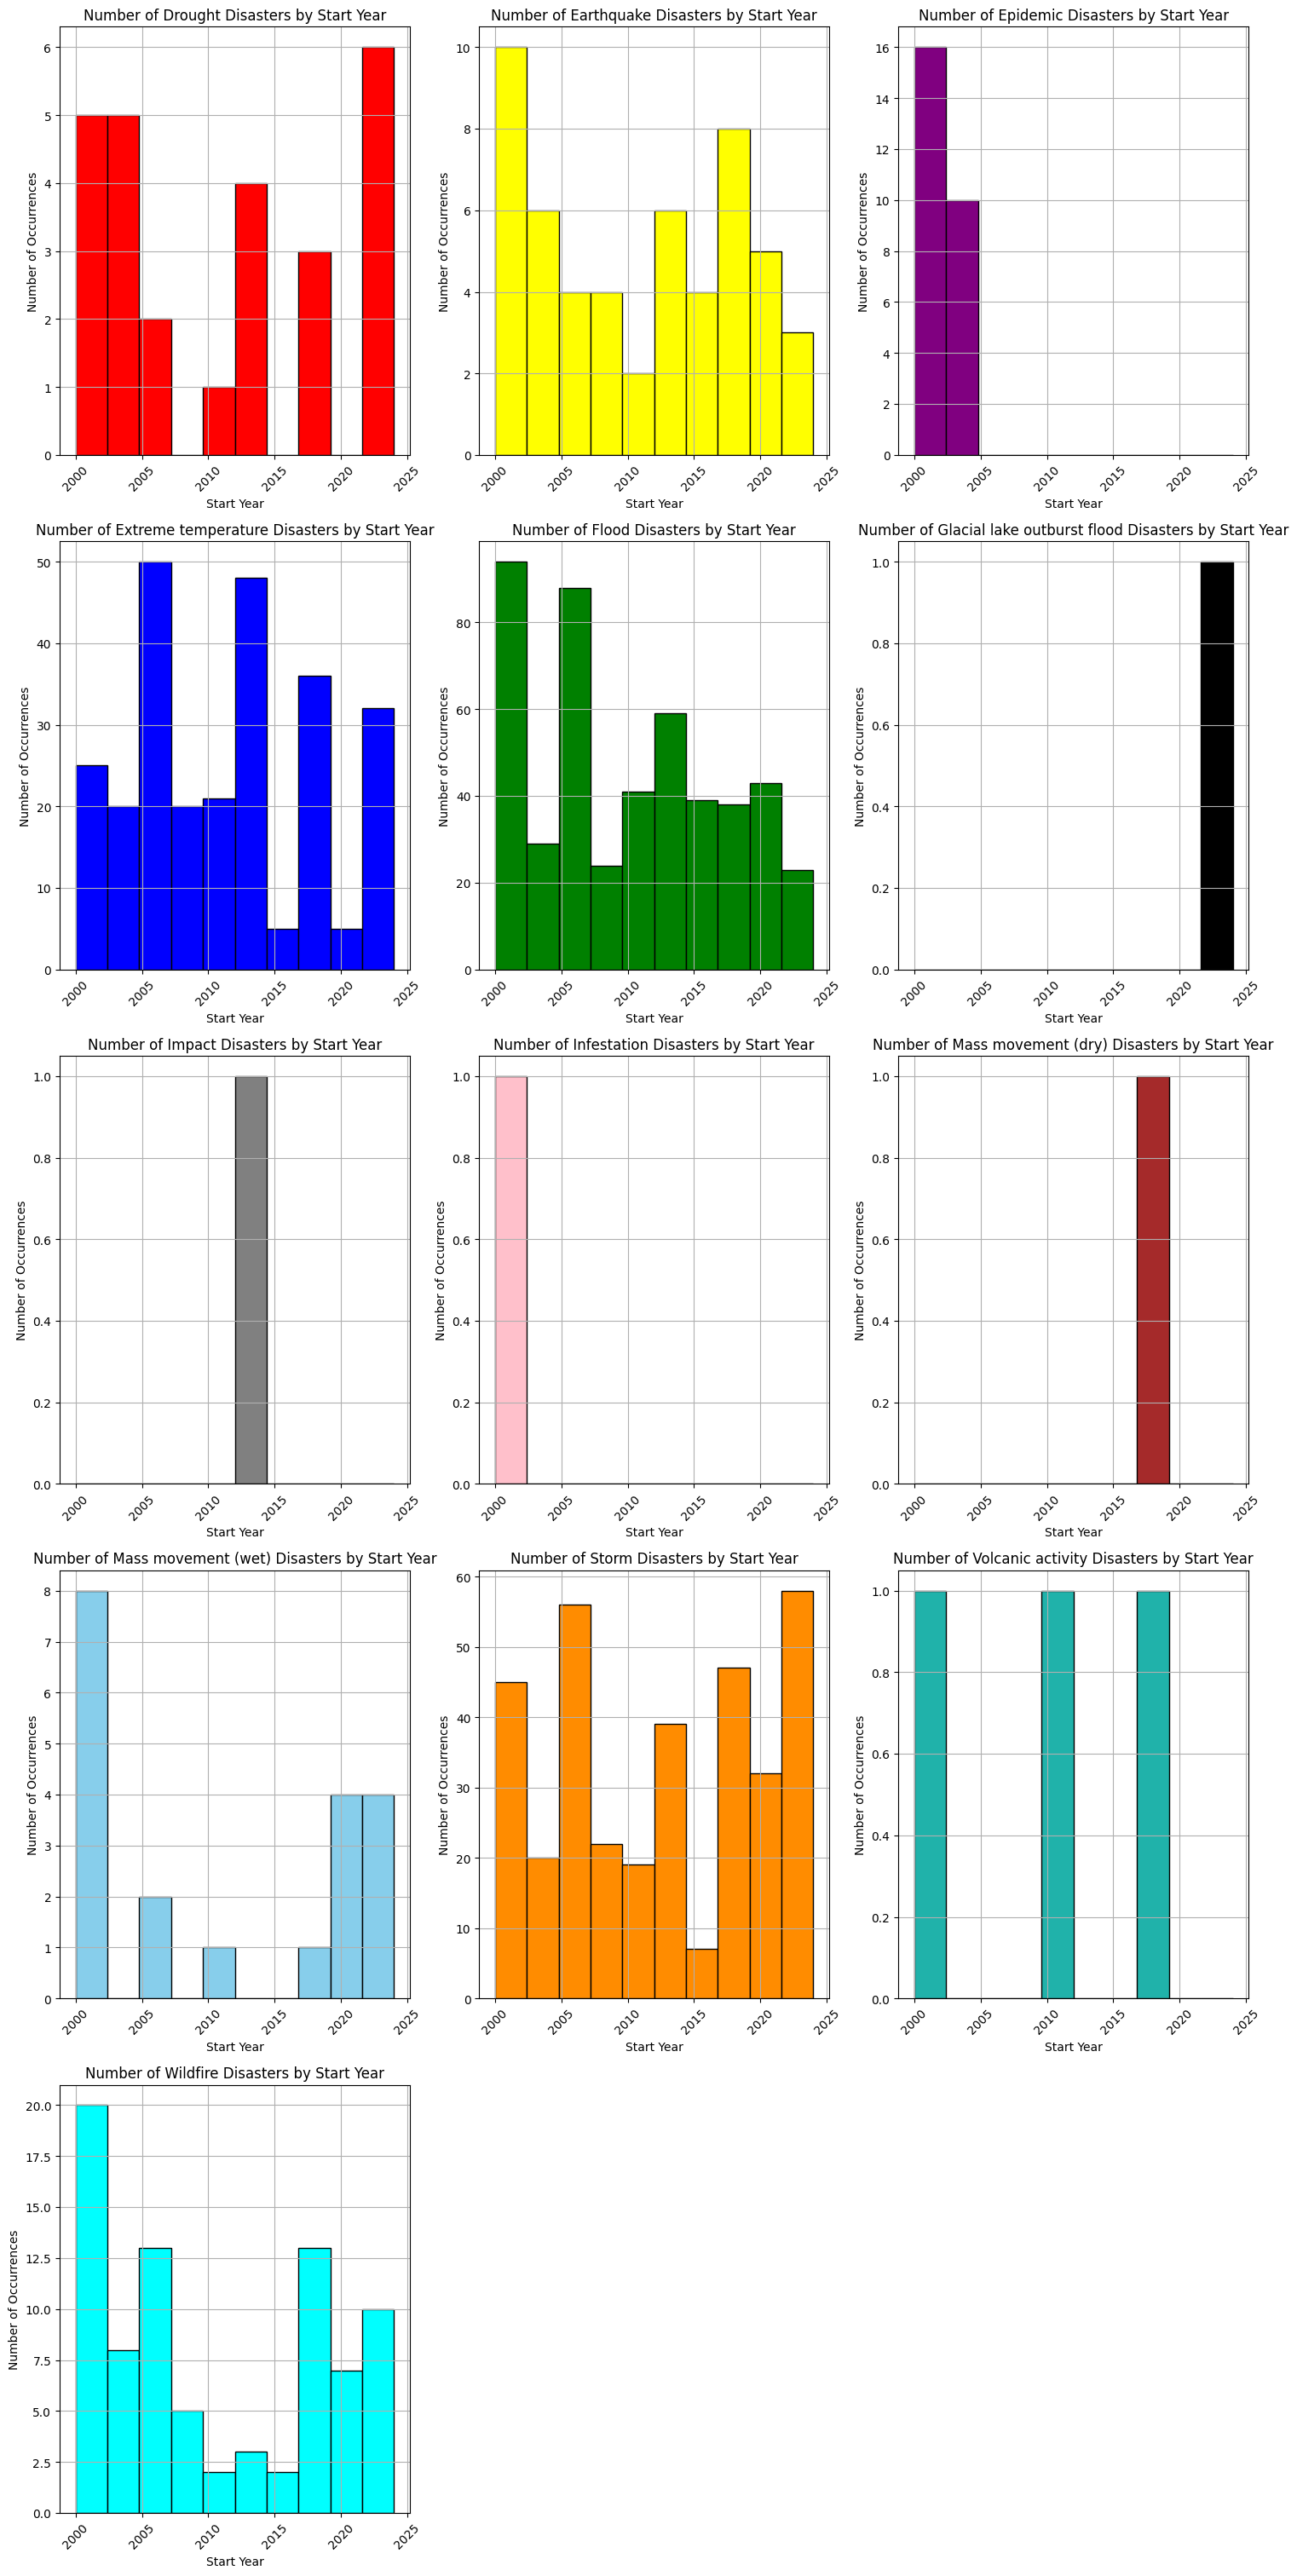

In [108]:
grouped = filter_natural.groupby(['Start Year', 'Disaster Type']).size().unstack(fill_value=0)

num_disaster_types = len(grouped.columns)

plt.figure(figsize=(15, 6 * num_disaster_types))

for i, disaster_type in enumerate(grouped.columns):
    plt.subplot(num_disaster_types, 3, i + 1)
    plt.hist(grouped.index, weights=grouped[disaster_type], bins=10, color=generic_colors[i], edgecolor='black')
    plt.xlabel('Start Year')
    plt.ylabel('Number of Occurrences')
    plt.title(f'Number of {disaster_type} Disasters by Start Year')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()

plt.show()


In [ ]:
grouped

Disaster Type,Drought,Earthquake,Epidemic,Extreme temperature,Flood,Glacial lake outburst flood,Impact,Infestation,Mass movement (dry),Mass movement (wet),Storm,Volcanic activity,Wildfire
Start Year,,,,,,,,,,,,,
2000,4,4,8,12,33,0,0,0,0,5,15,0,13
2001,0,1,3,10,24,0,0,1,0,0,8,1,4
2002,1,5,5,3,37,0,0,0,0,3,22,0,3
2003,4,3,10,16,15,0,0,0,0,0,7,0,5
2004,1,3,0,4,14,0,0,0,0,0,13,0,3
2005,0,0,0,21,39,0,0,0,0,1,25,0,3
2006,1,2,0,17,30,0,0,0,0,1,9,0,1
2007,1,2,0,12,19,0,0,0,0,0,22,0,9
2008,0,2,0,3,9,0,0,0,0,0,13,0,0


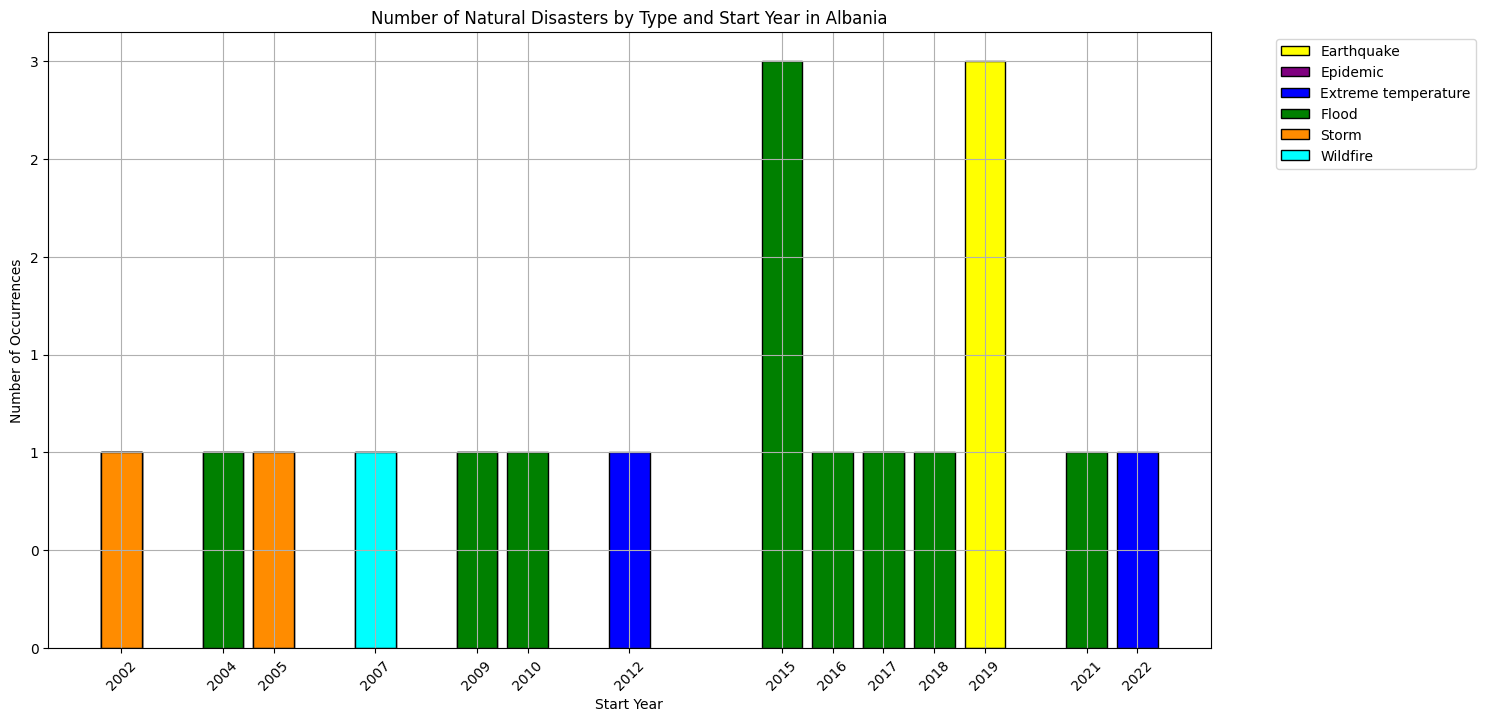

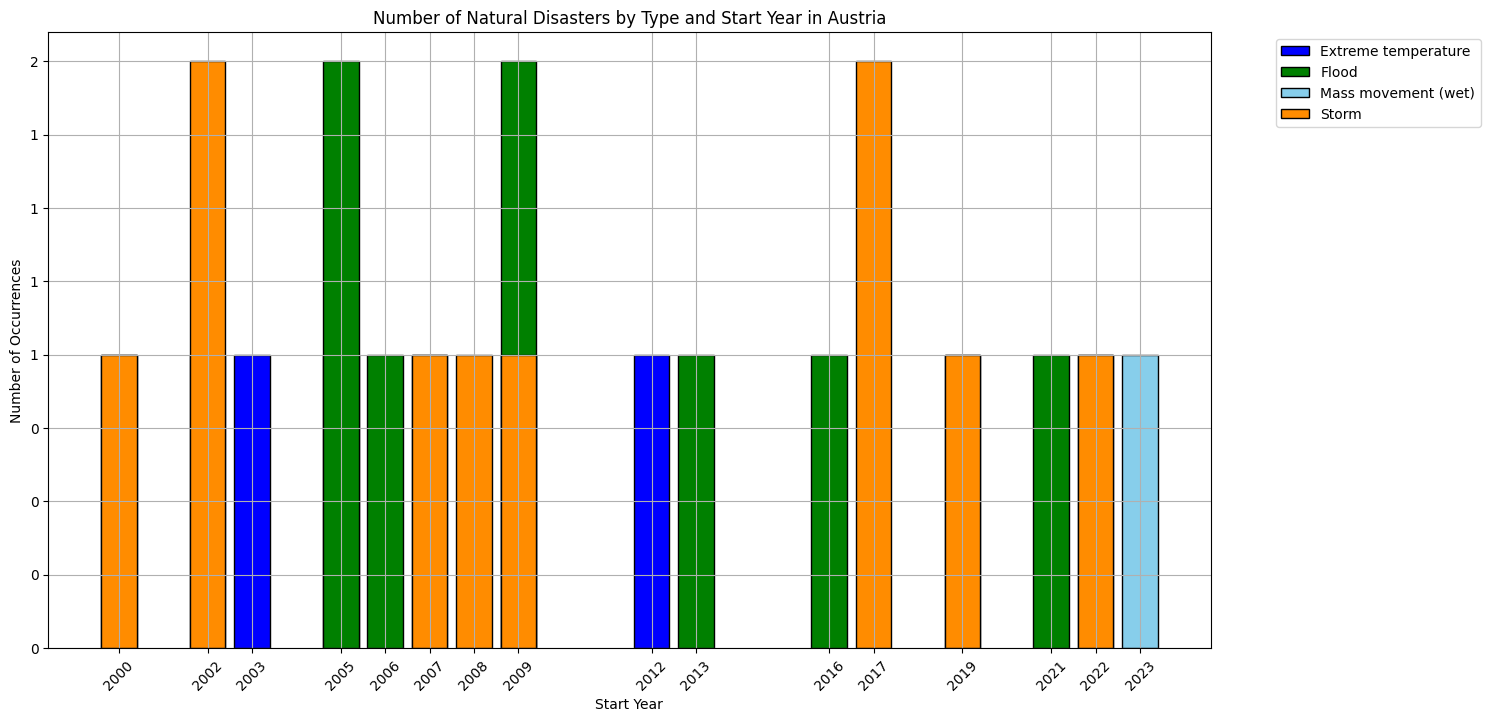

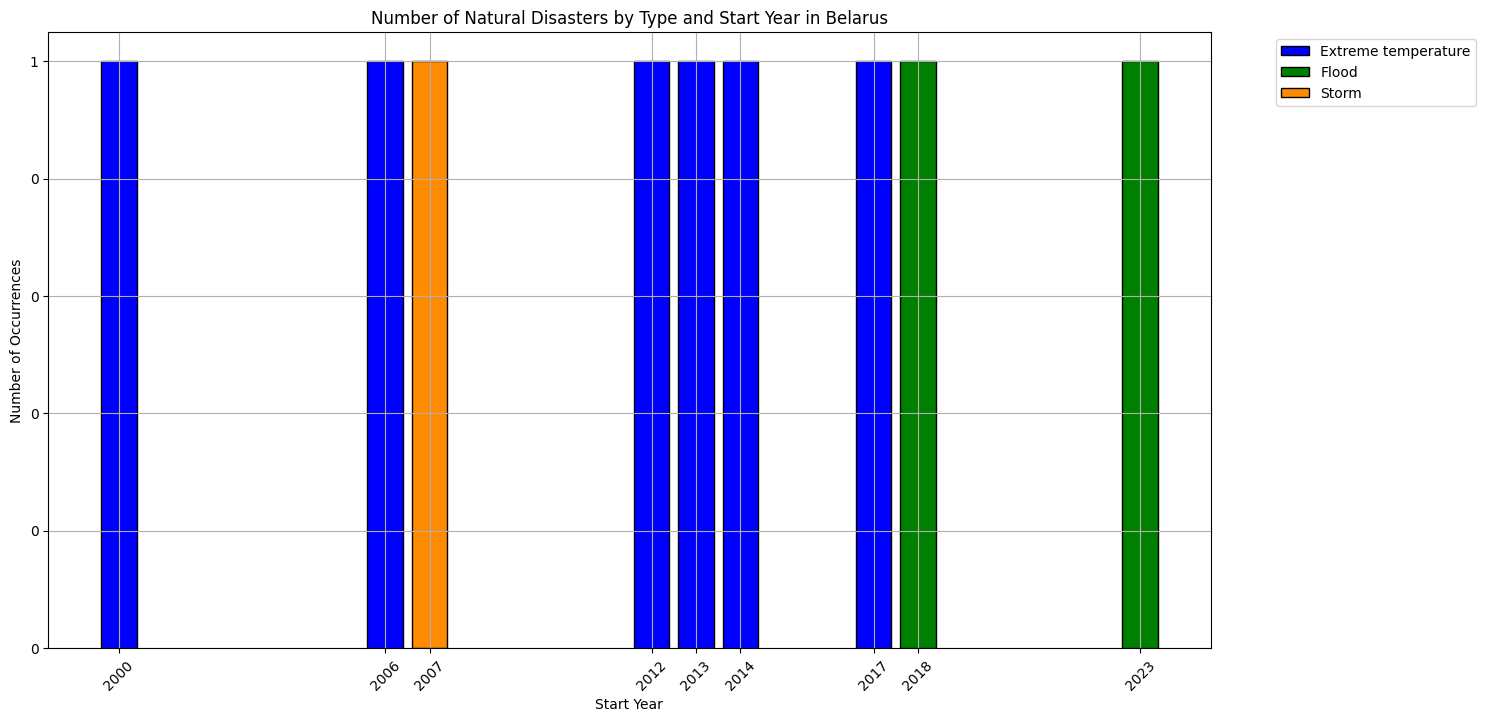

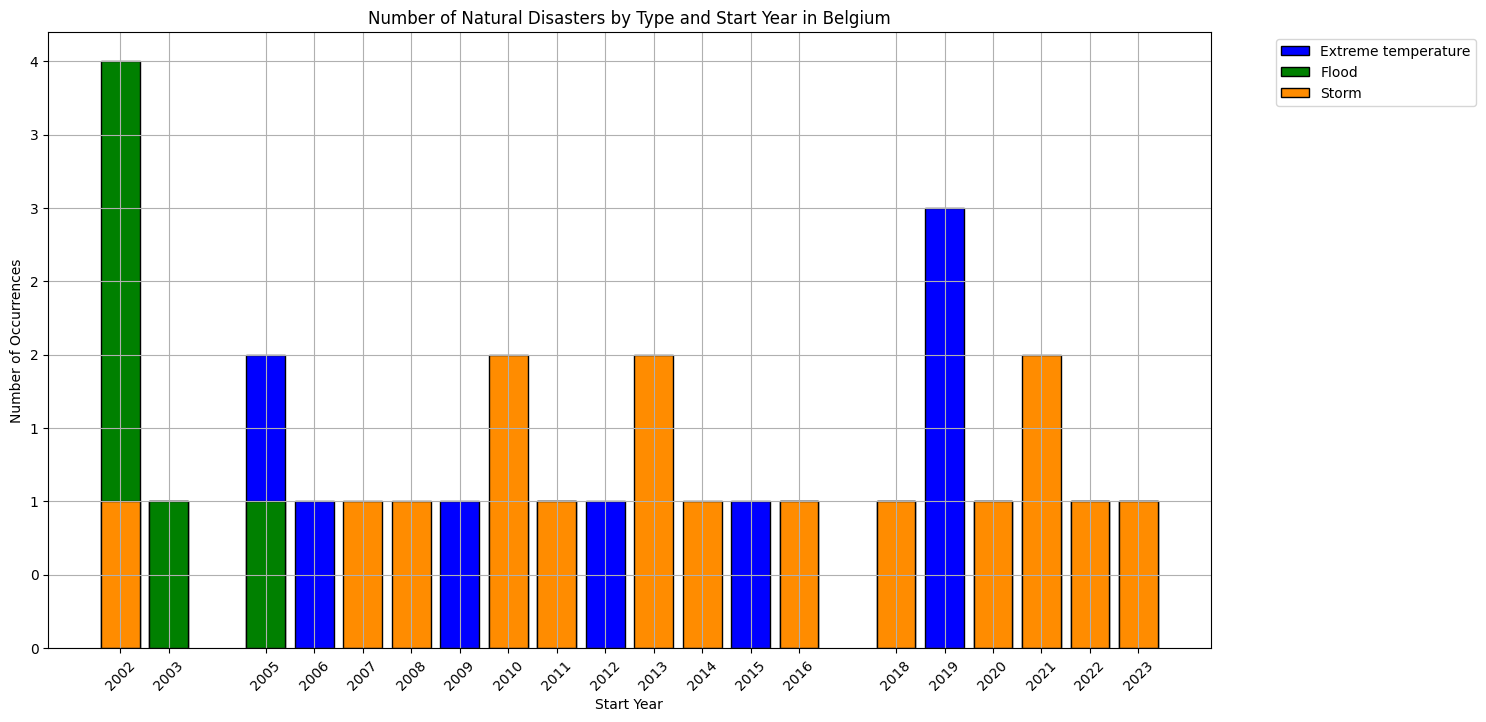

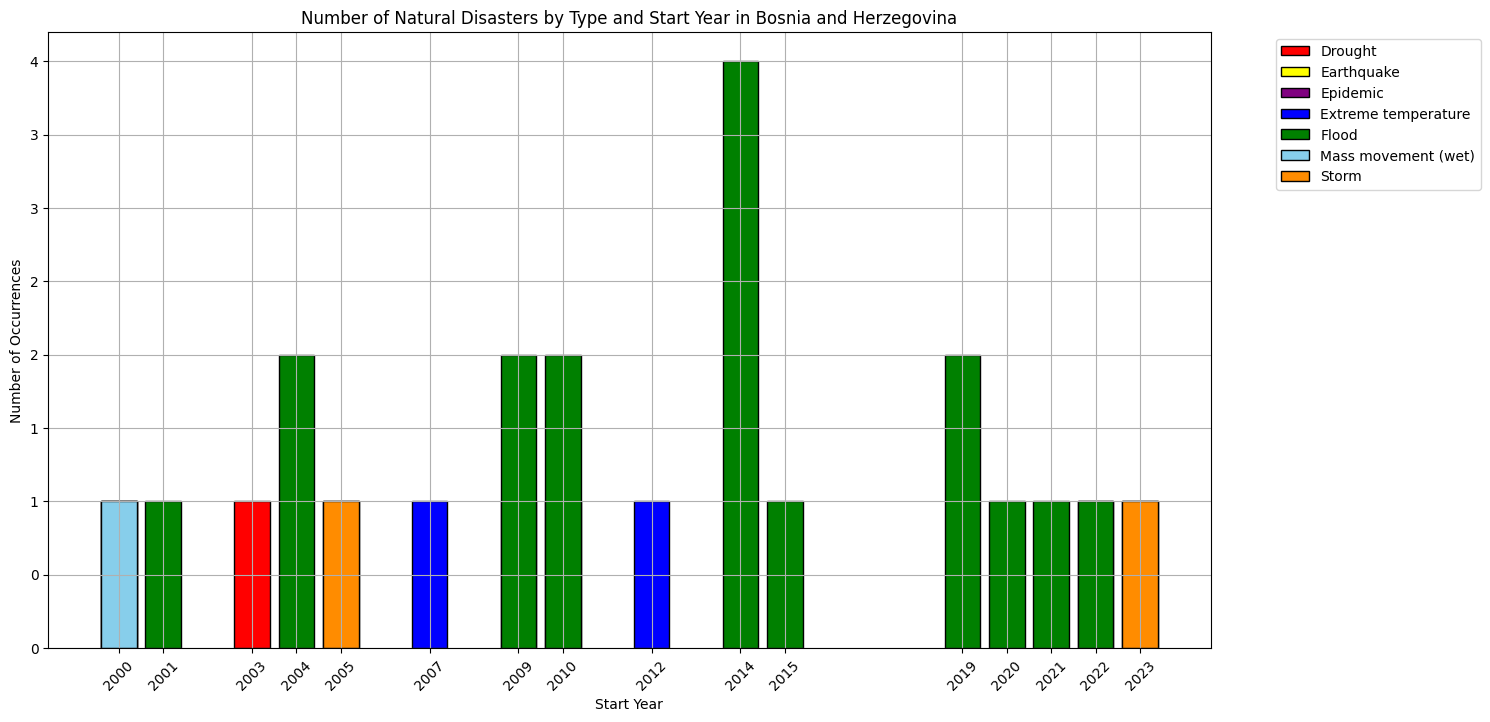

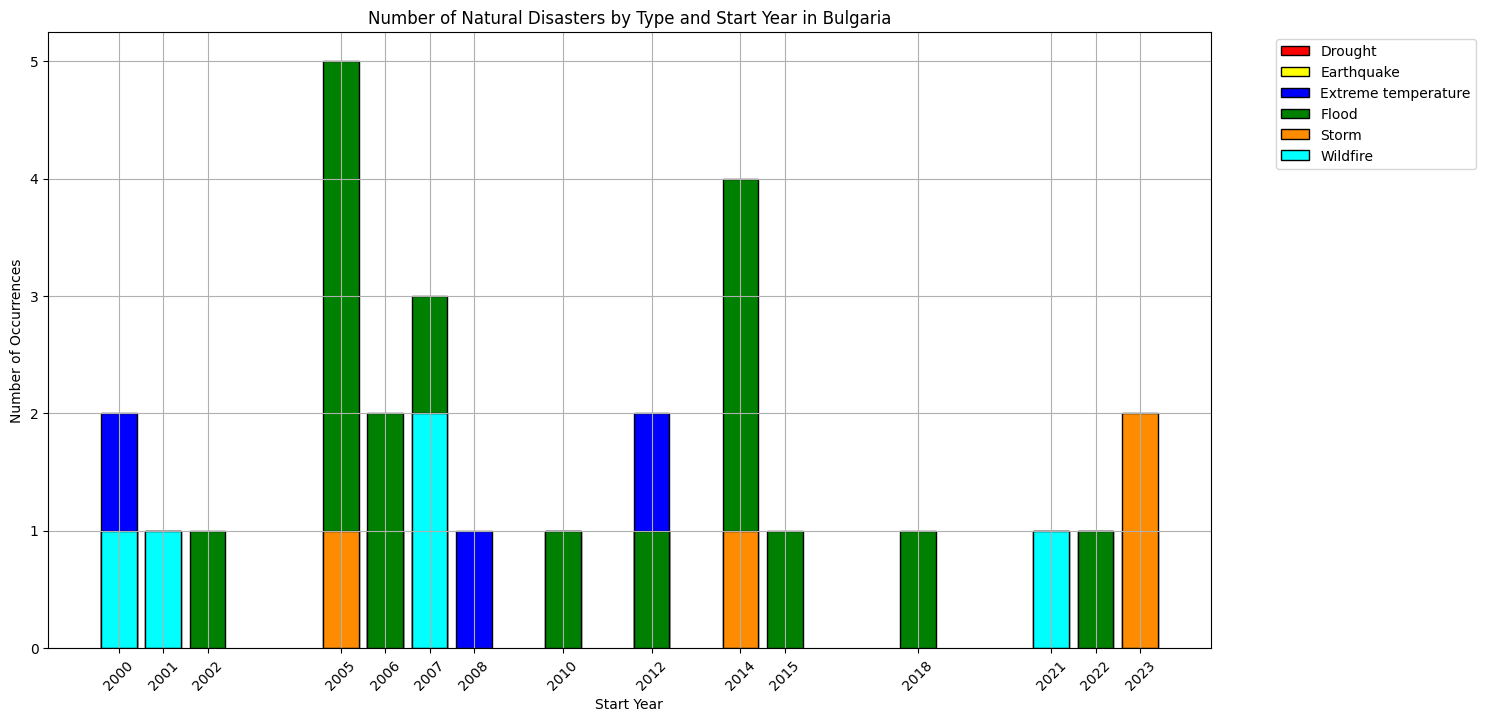

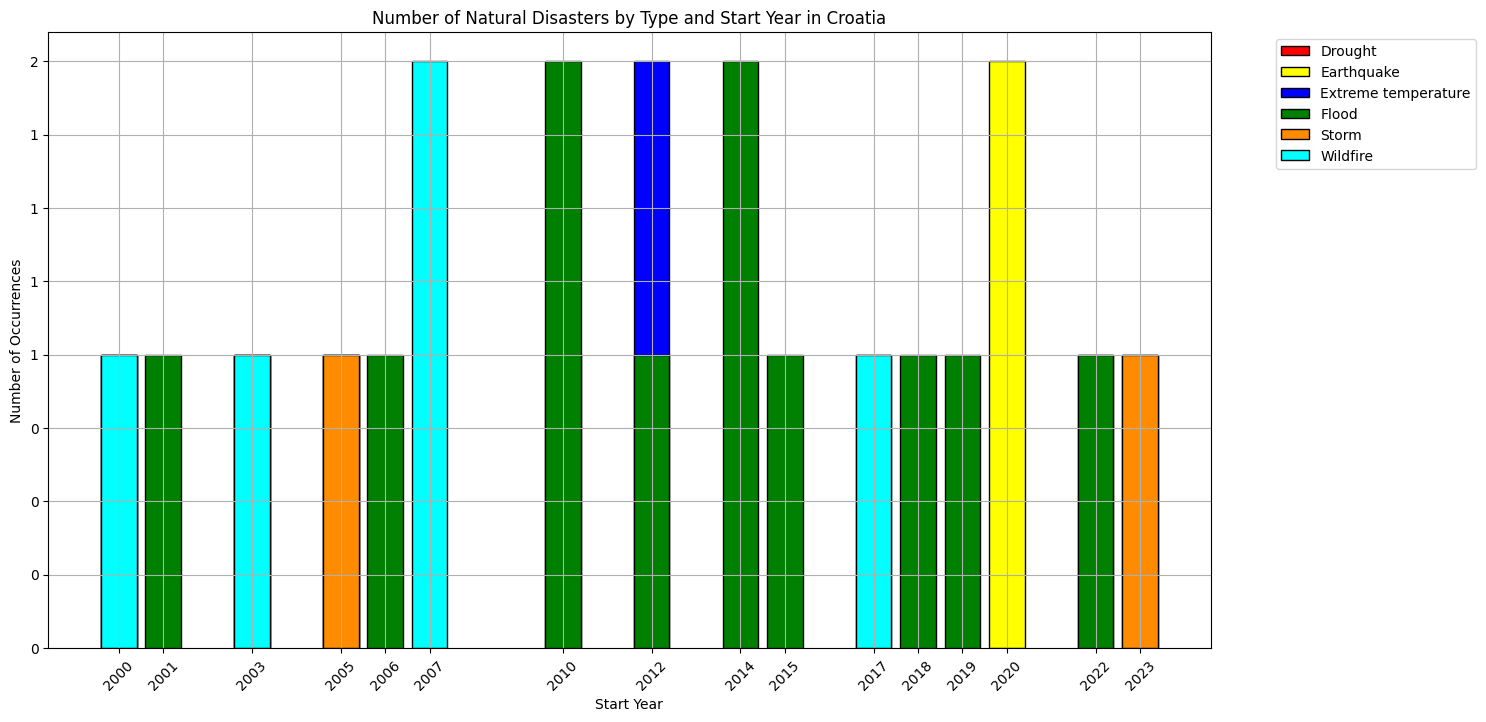

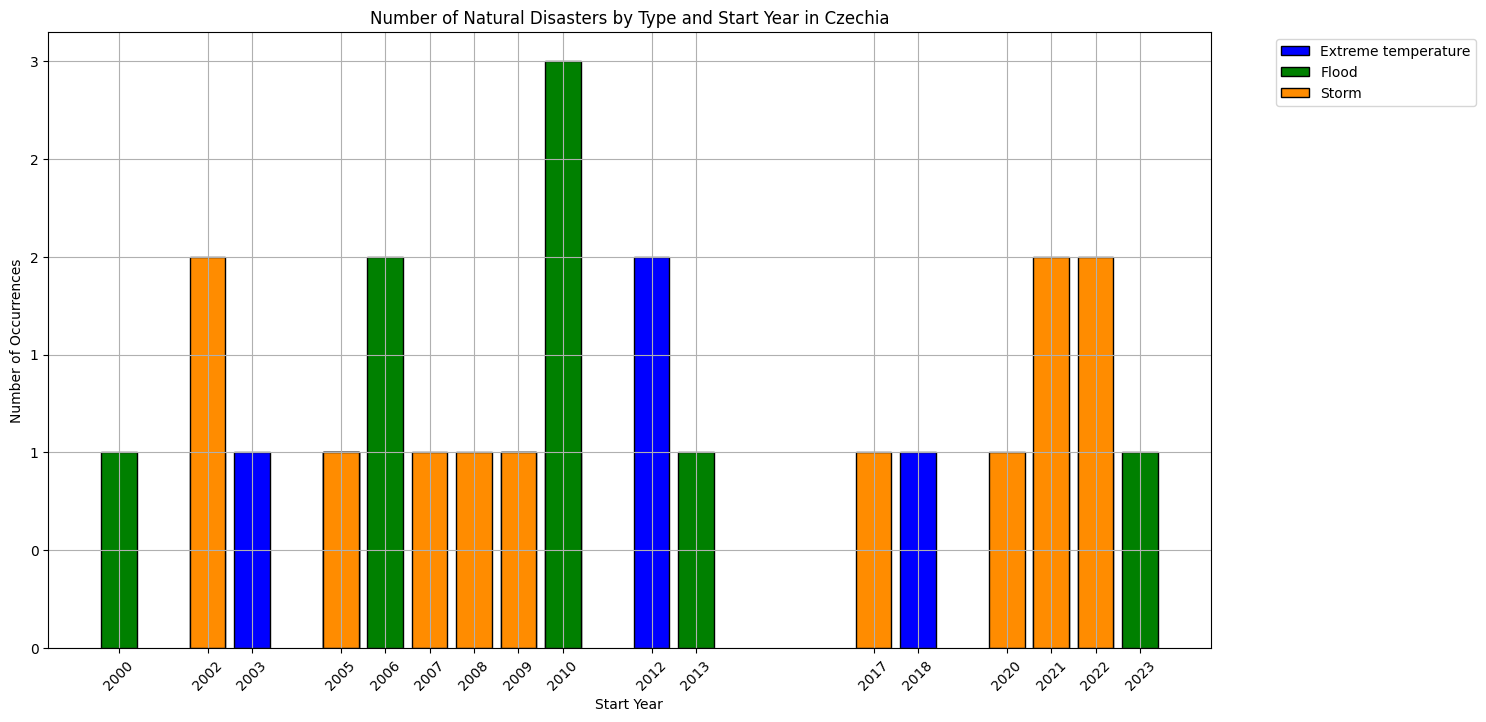

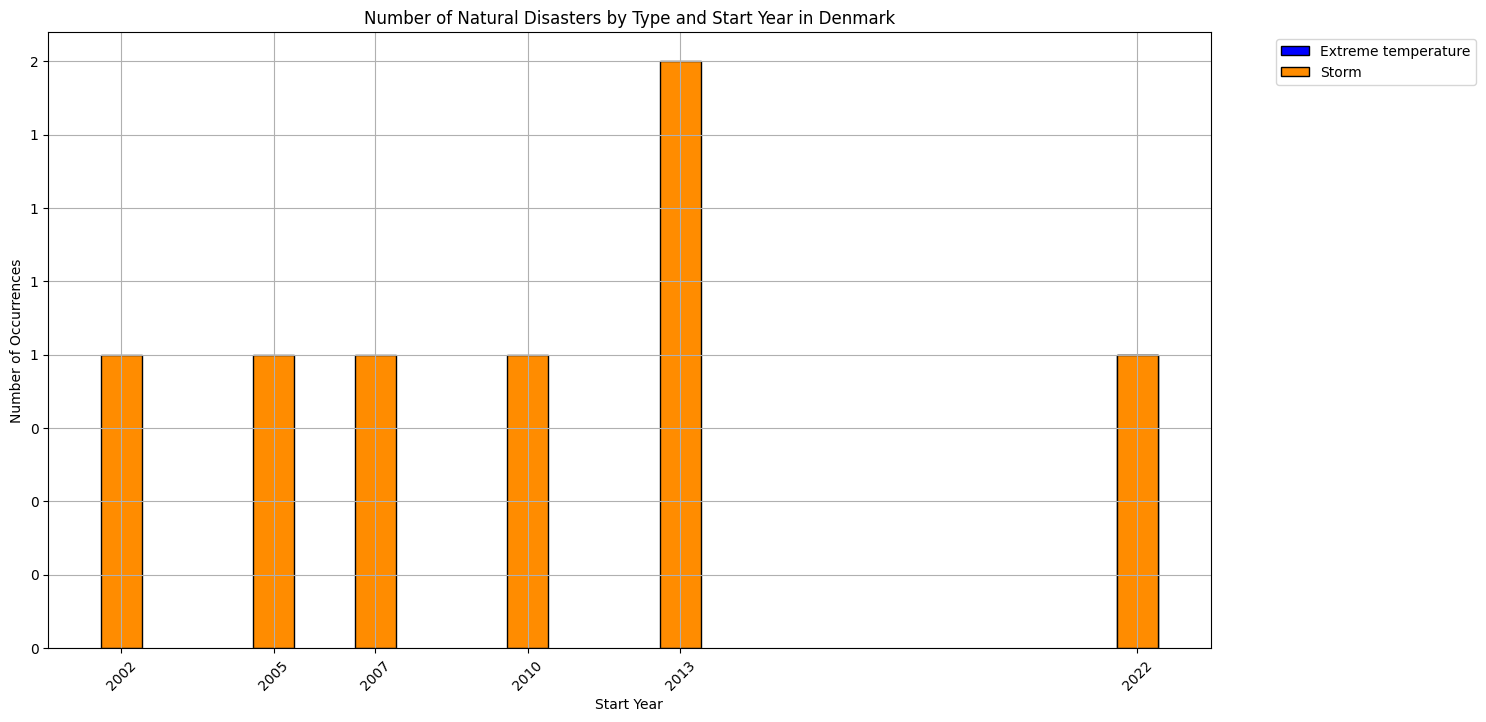

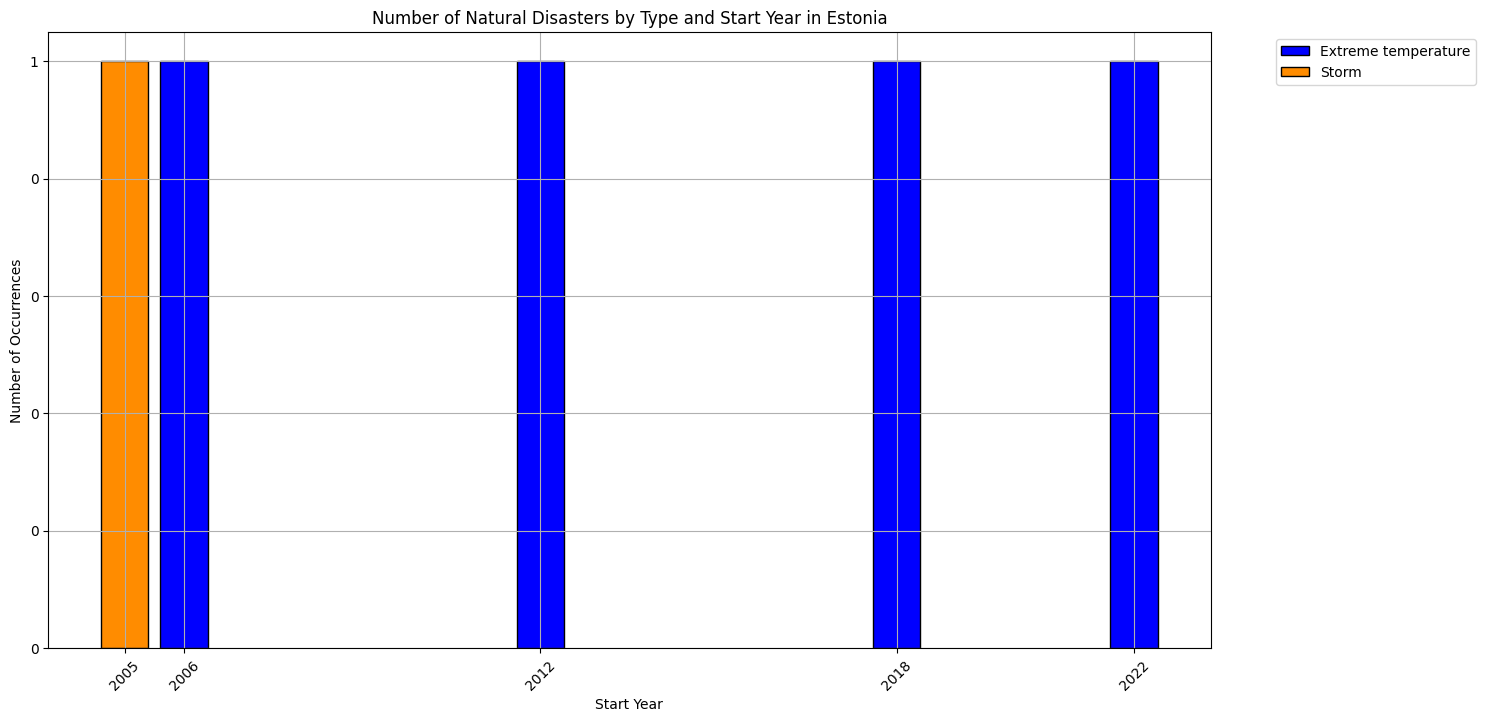

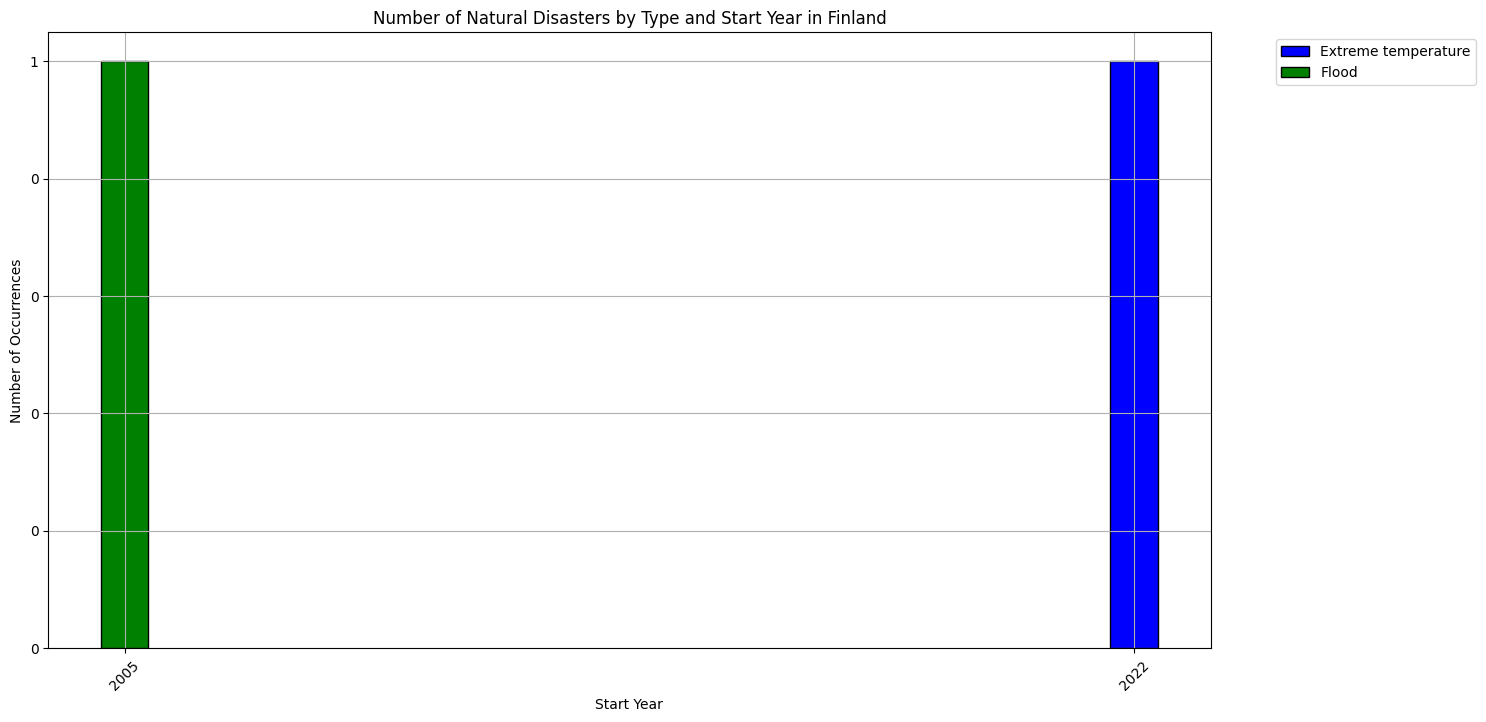

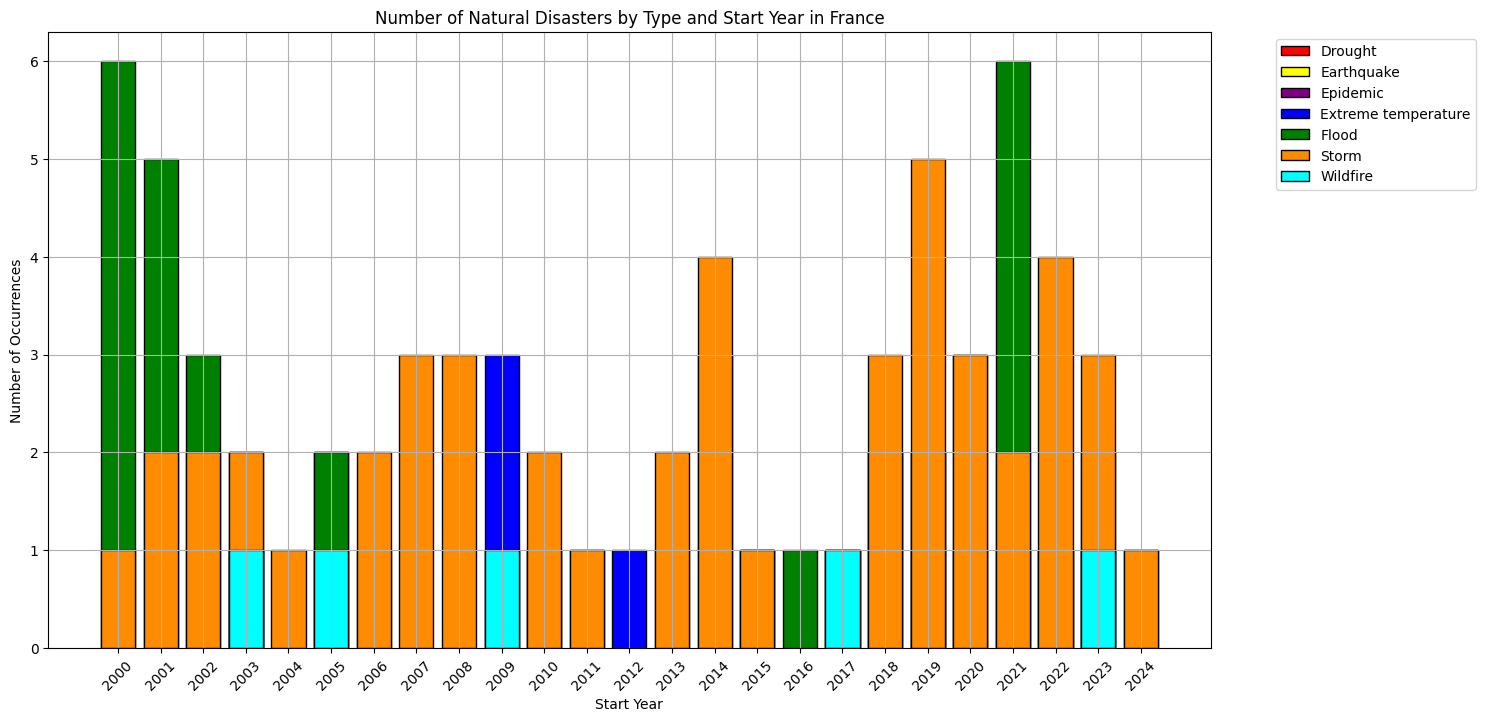

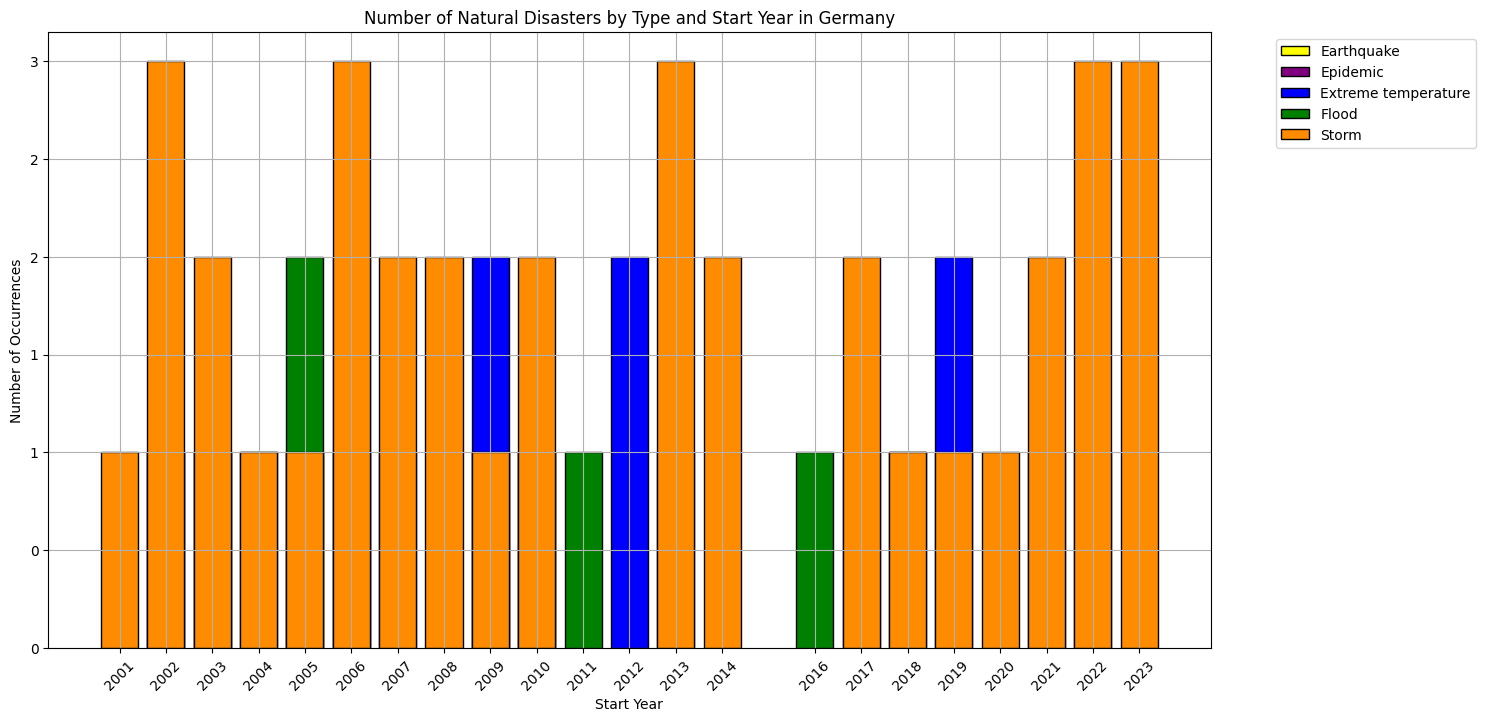

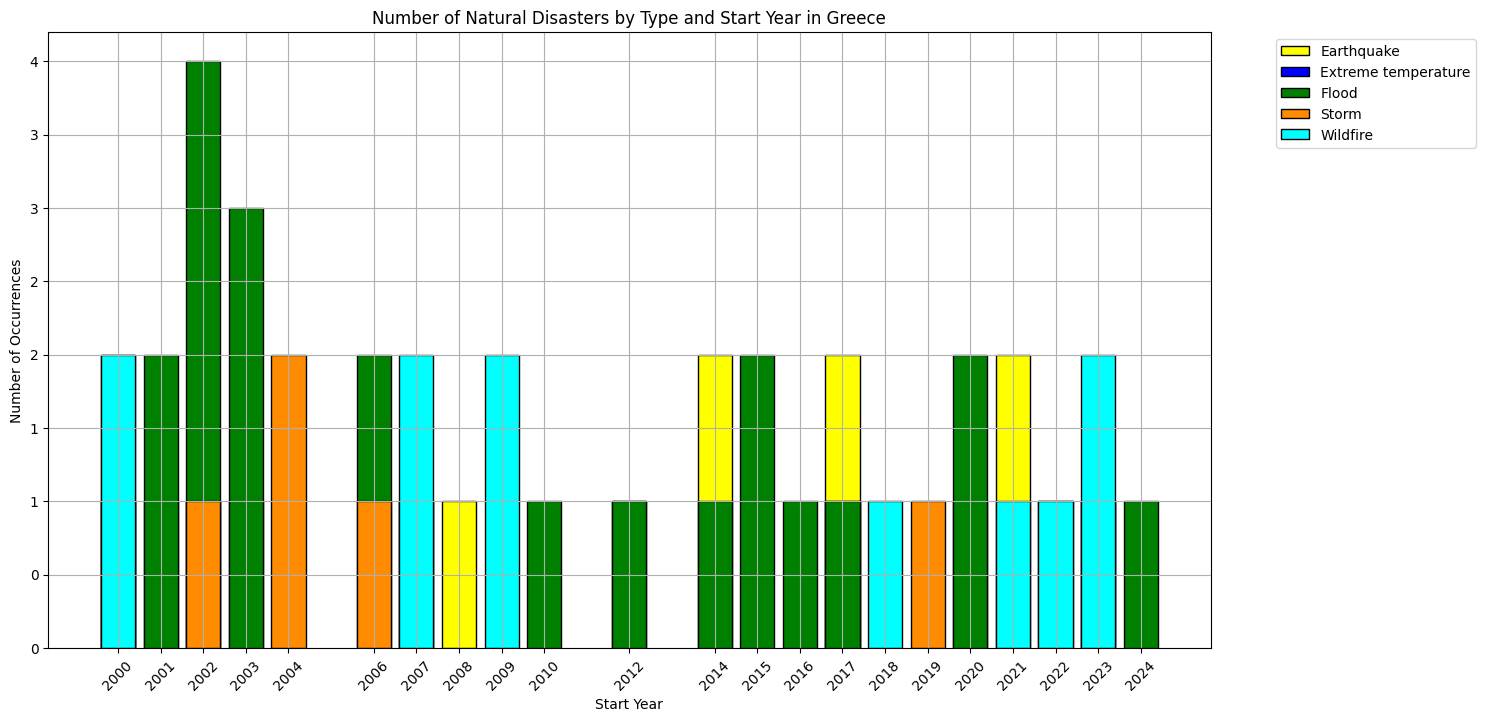

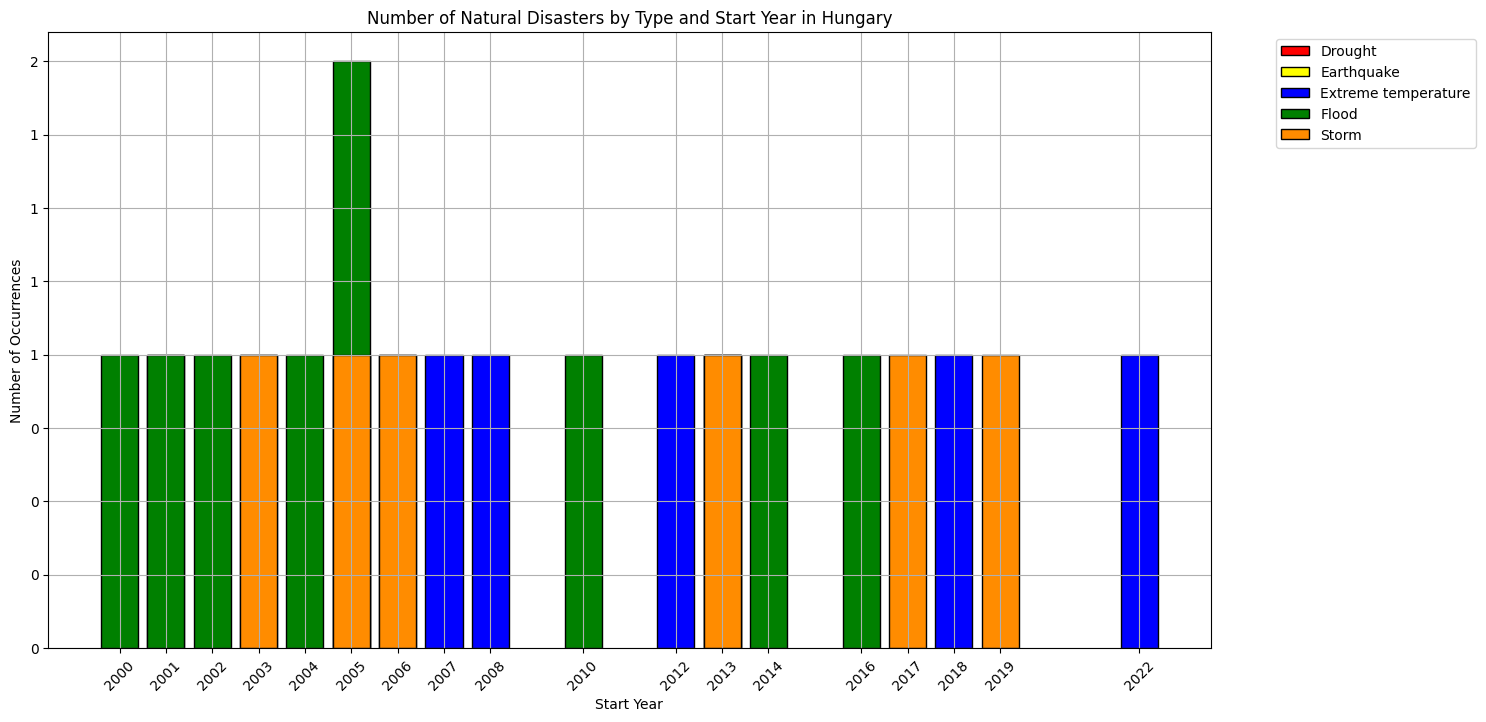

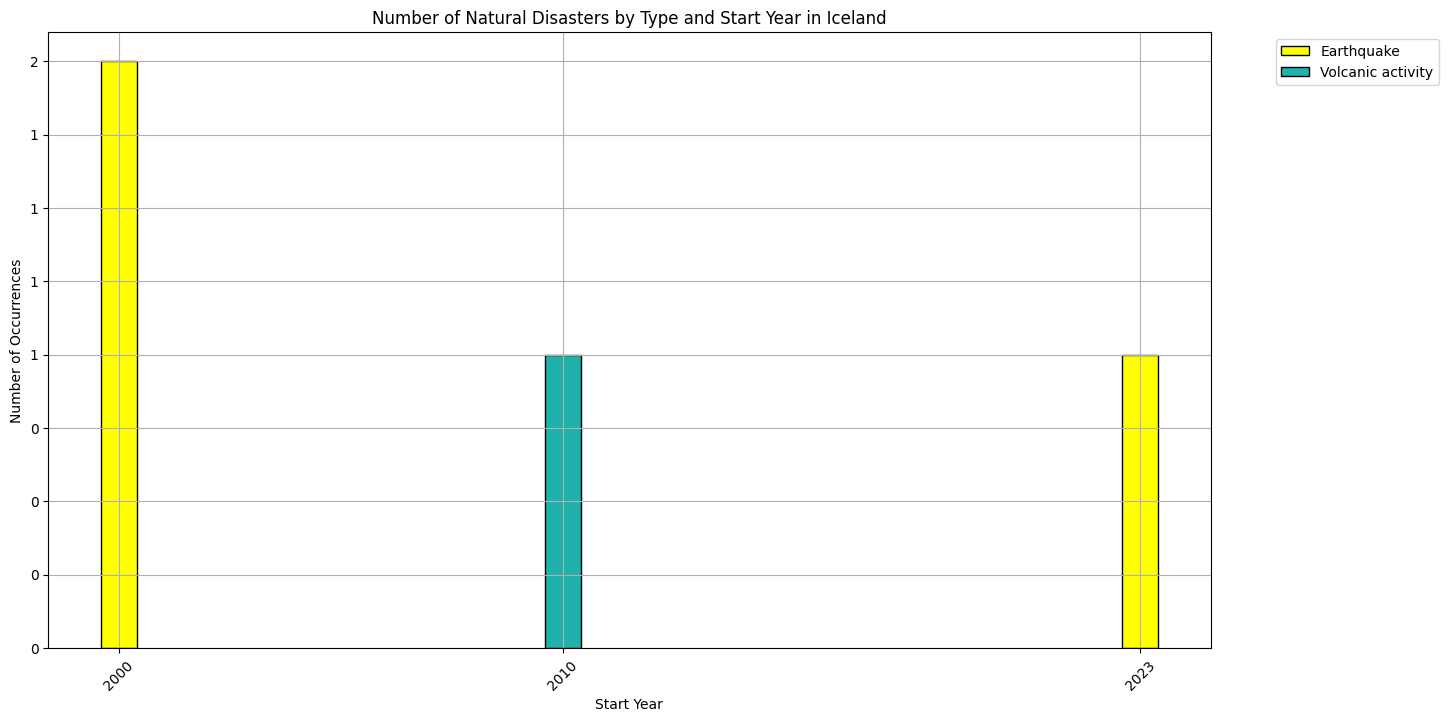

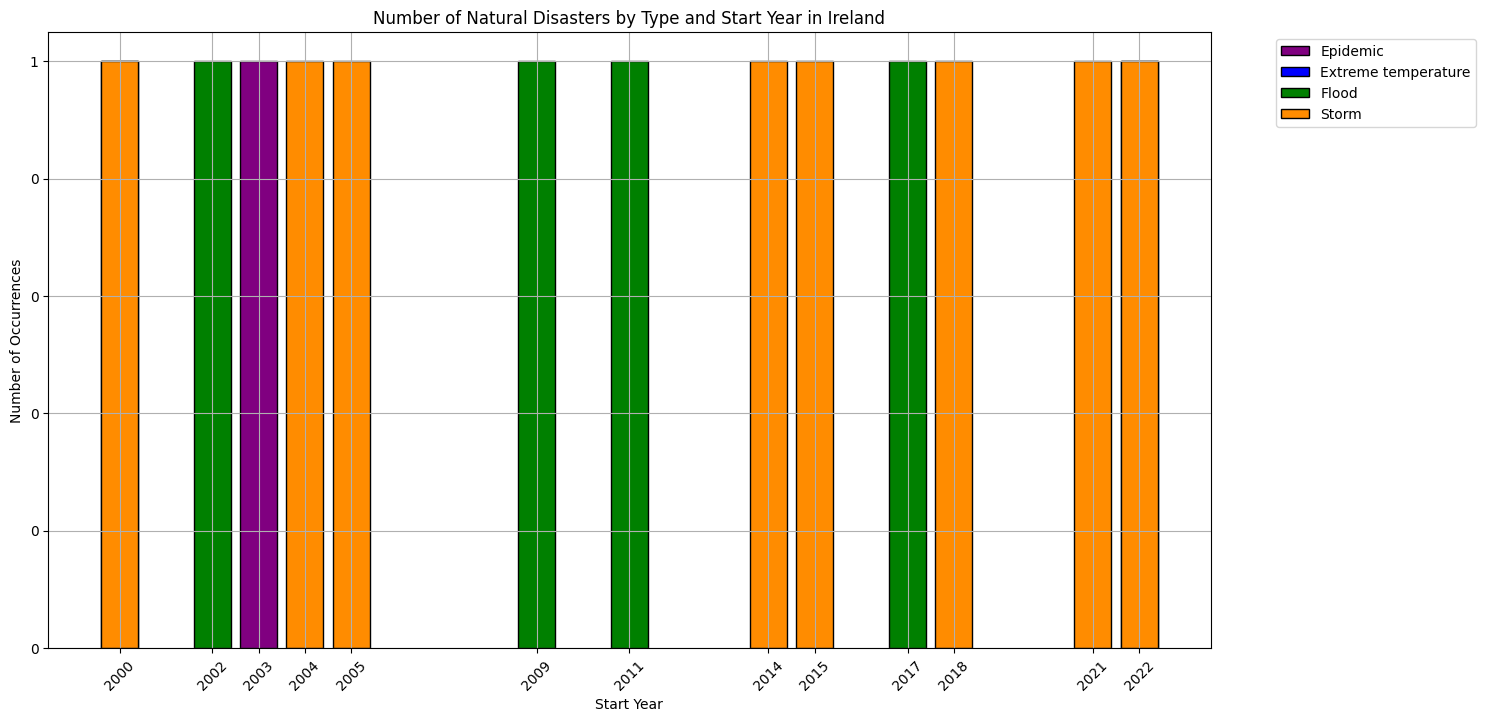

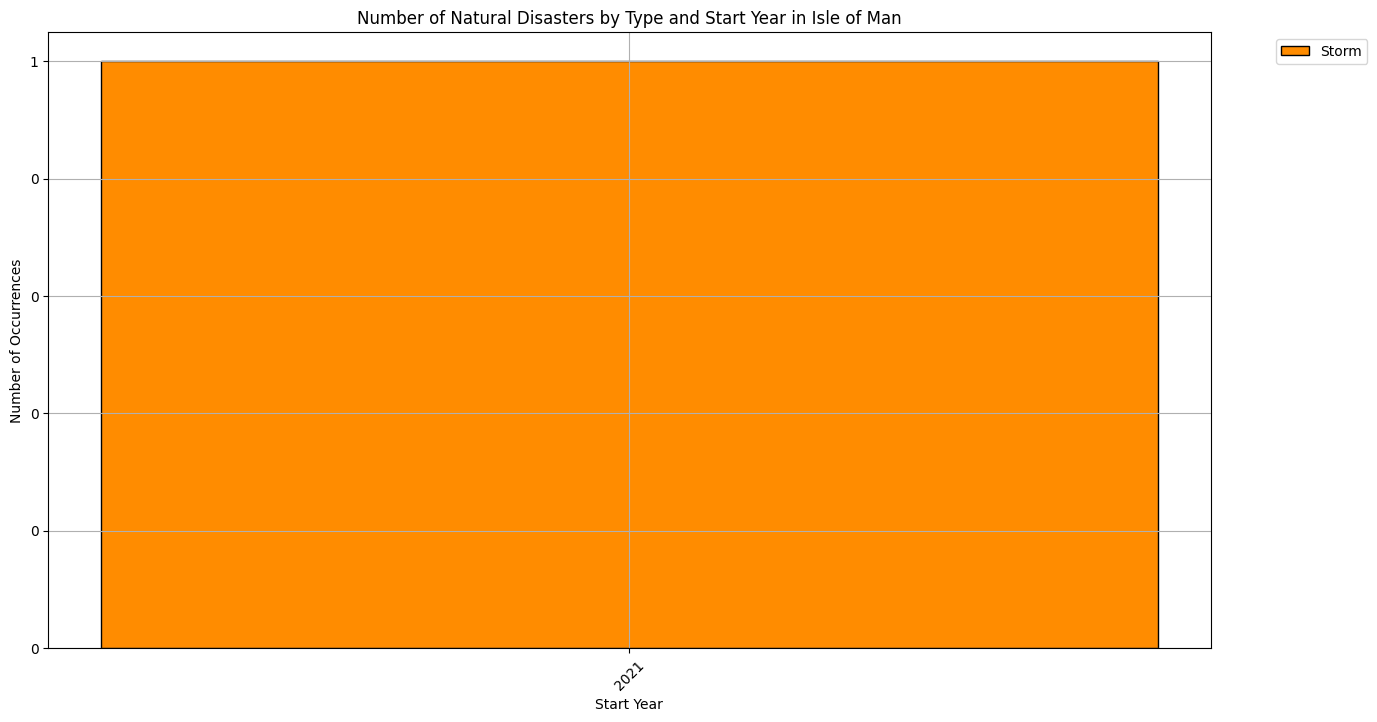

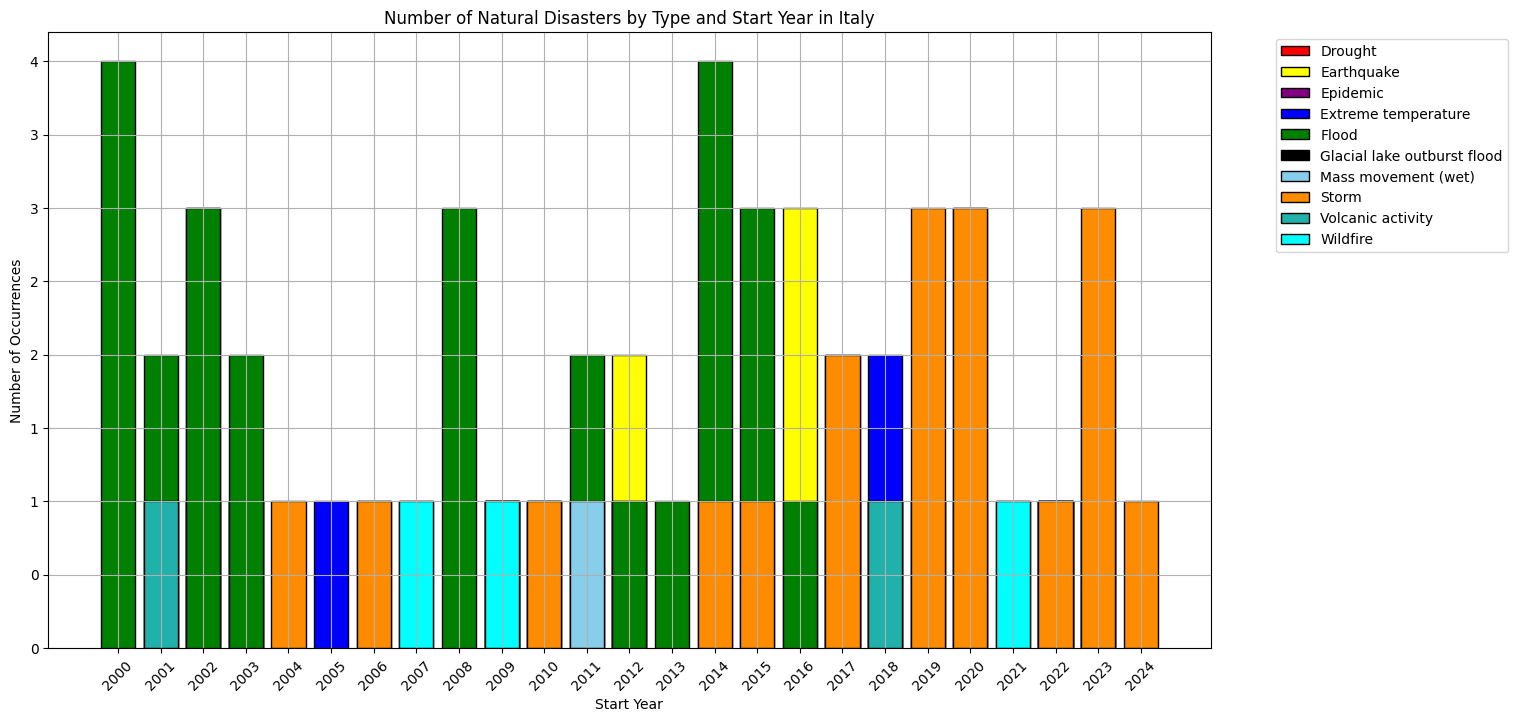

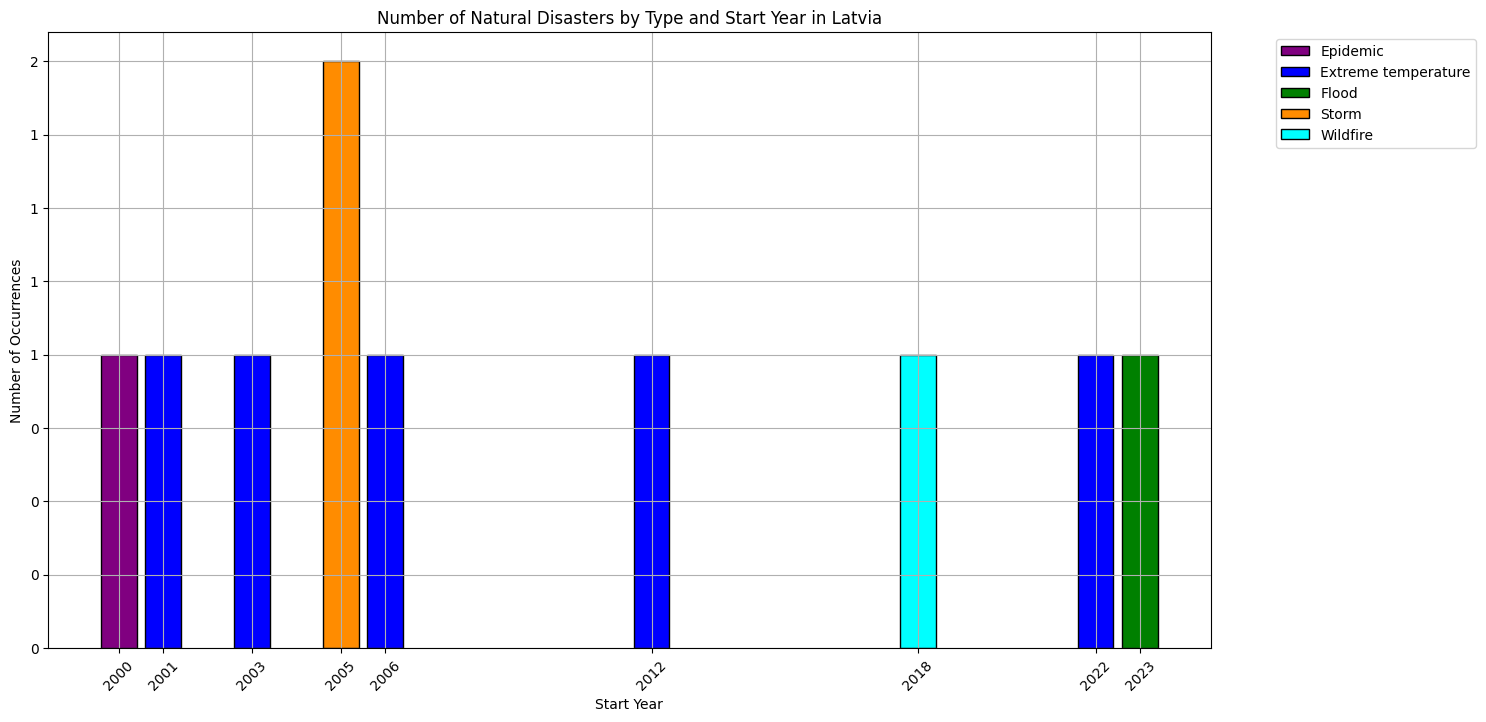

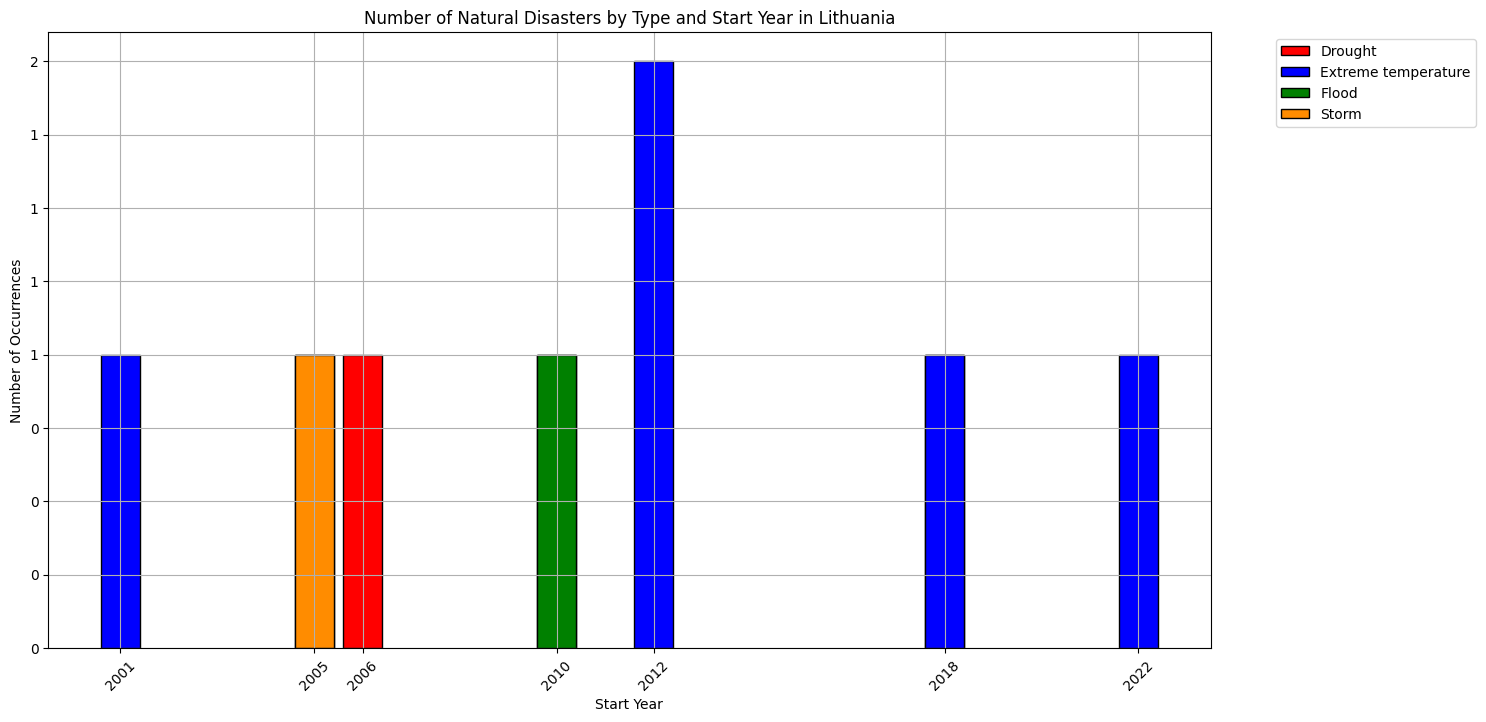

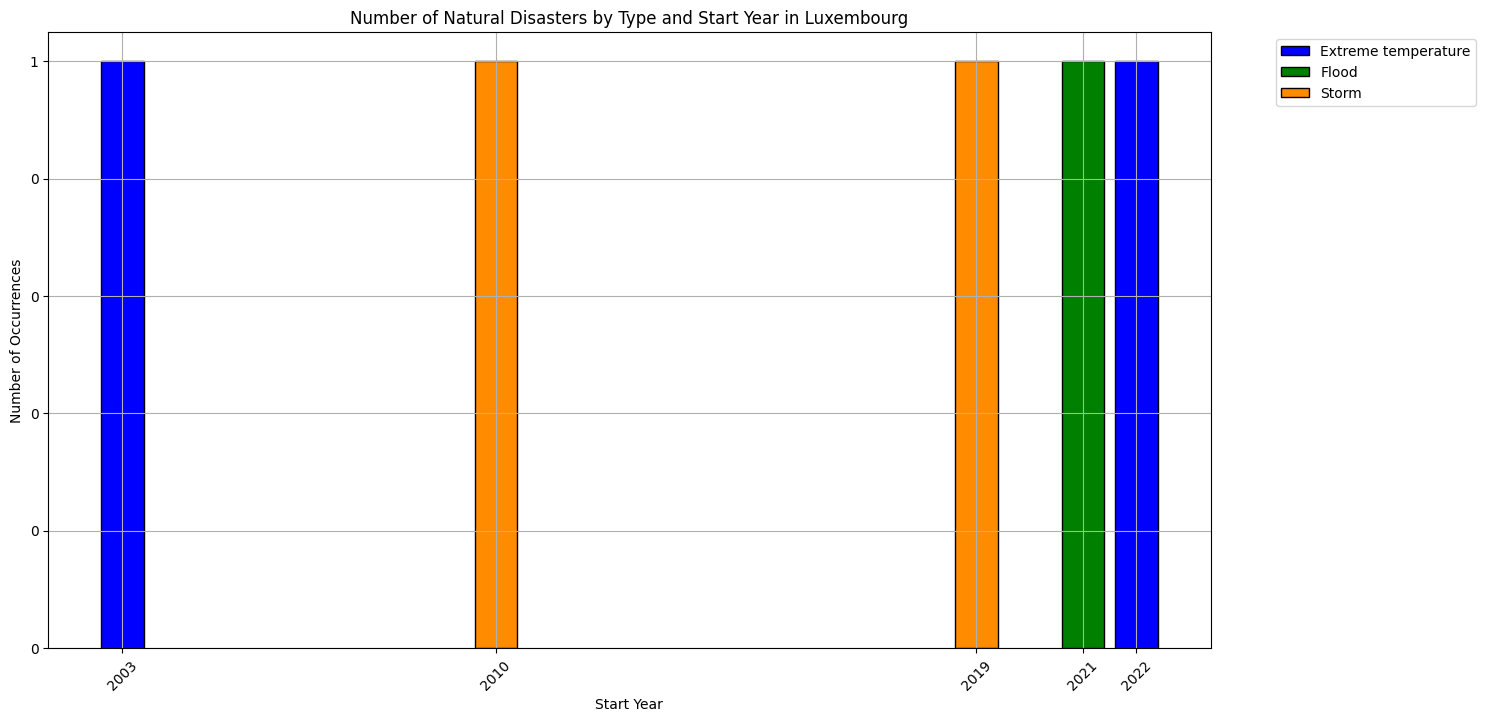

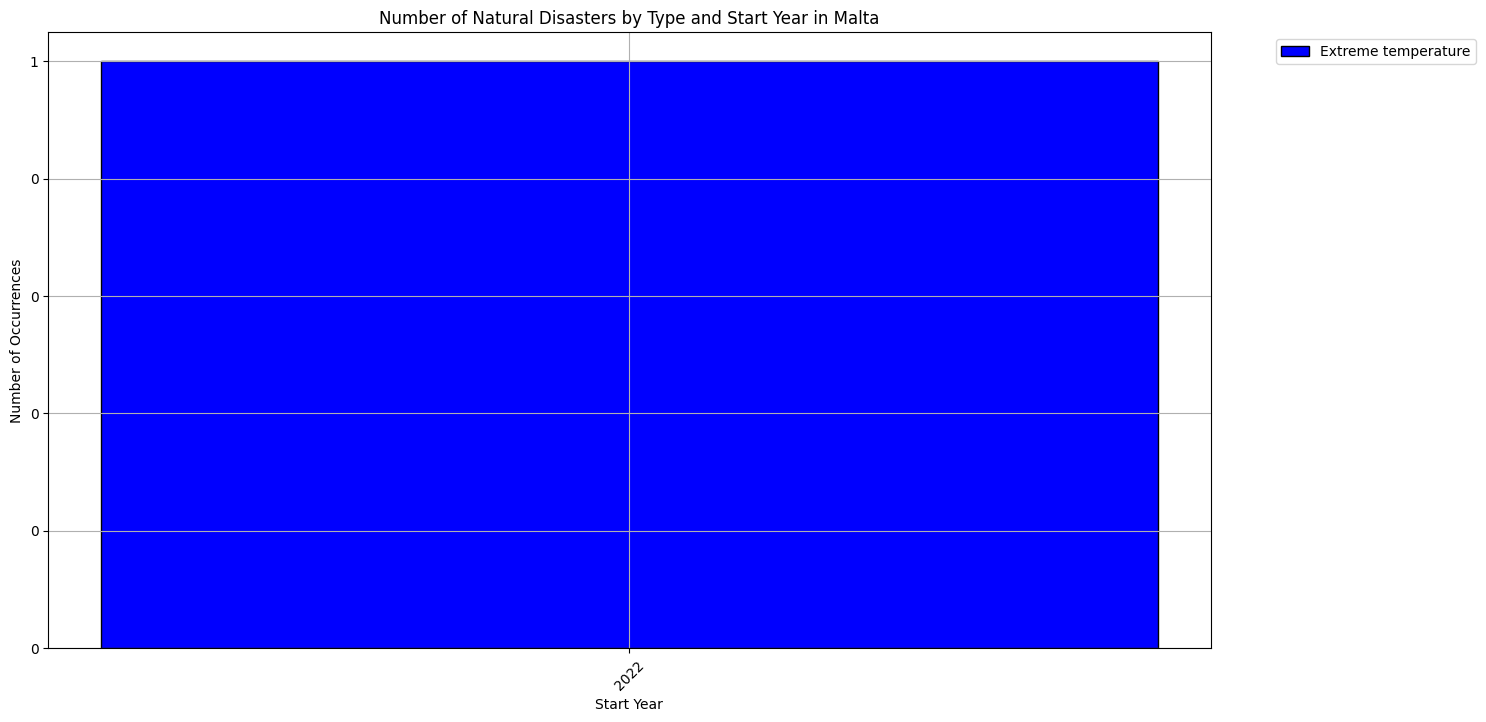

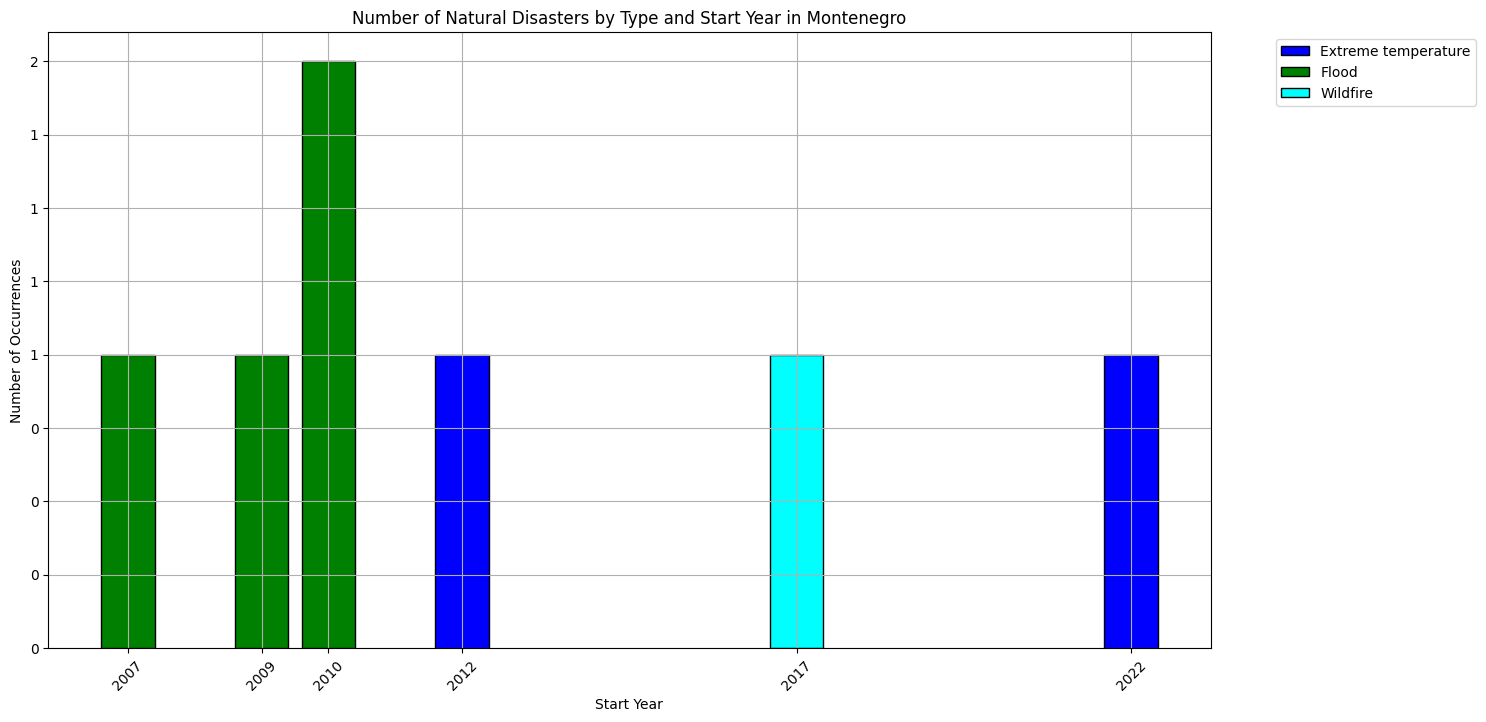

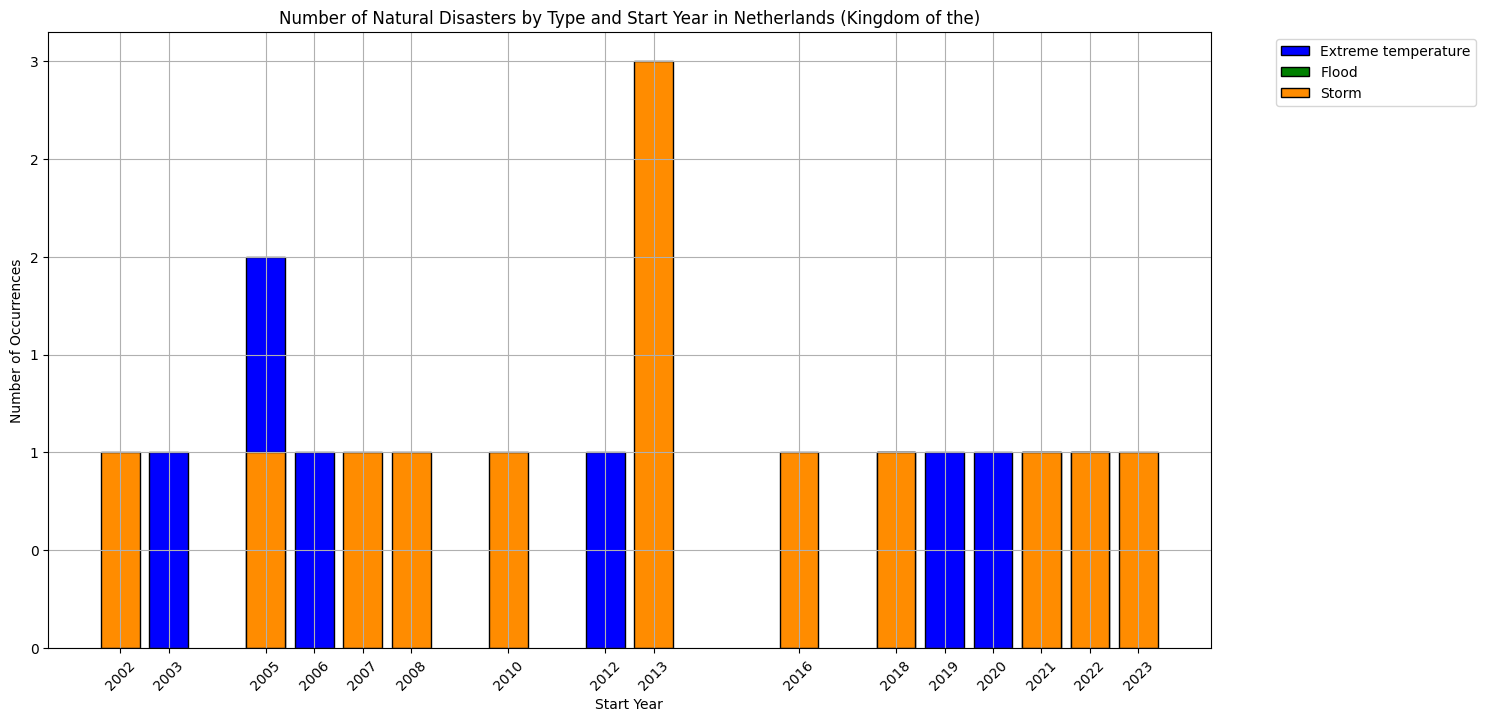

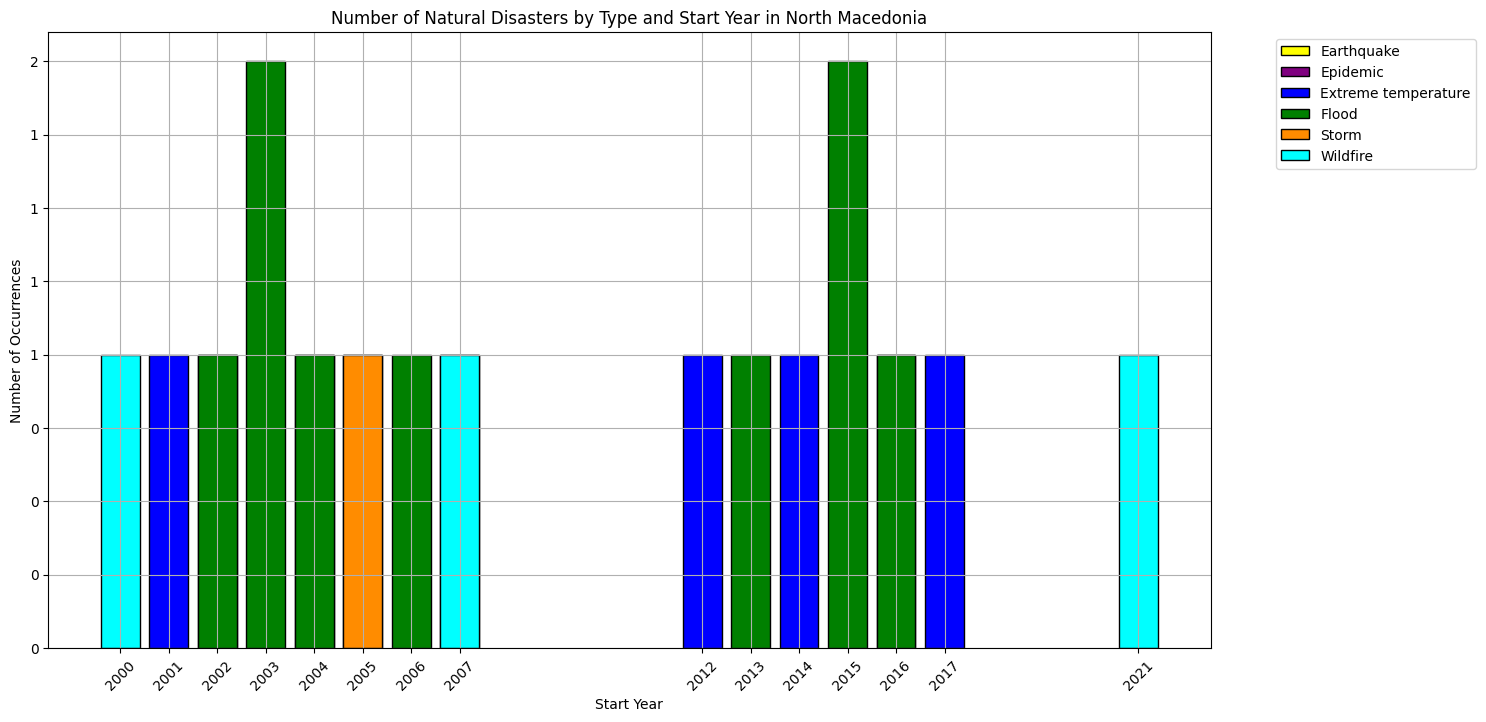

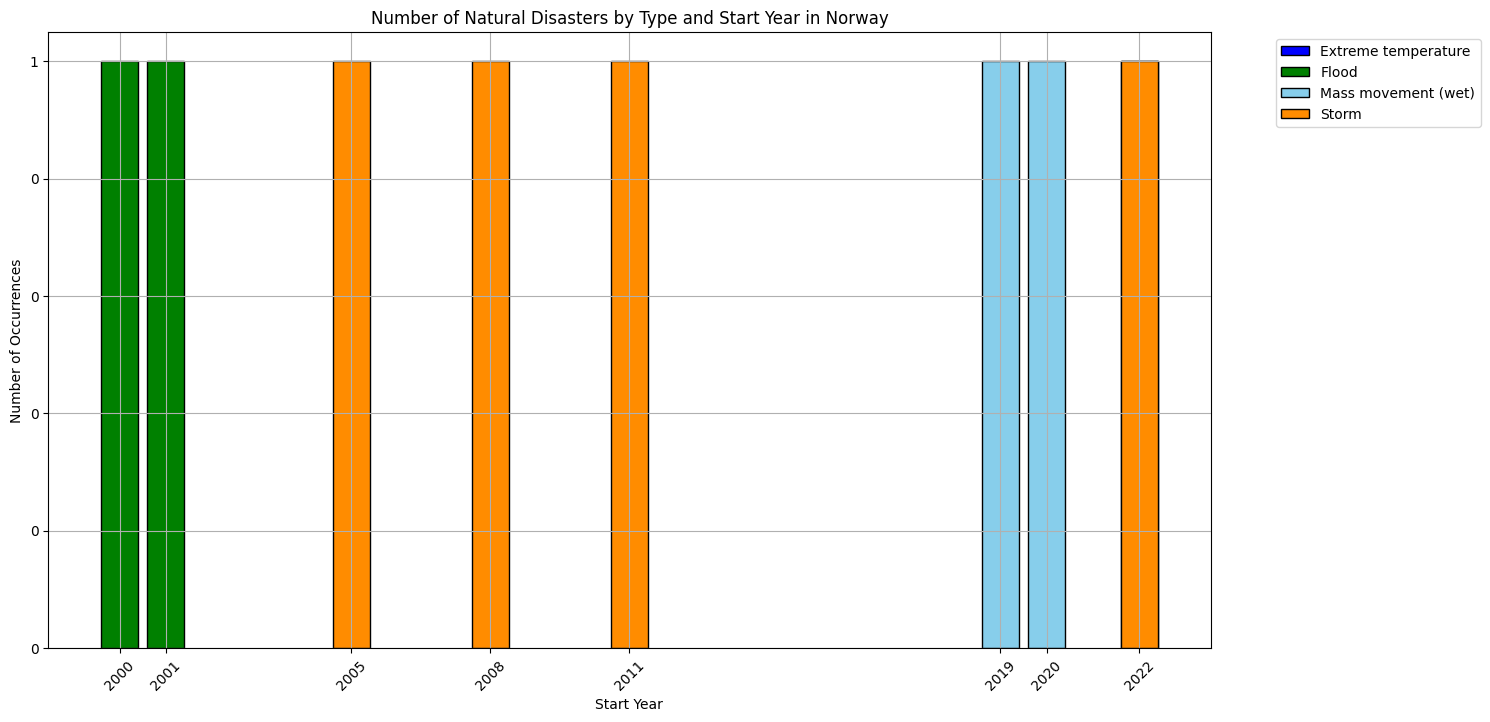

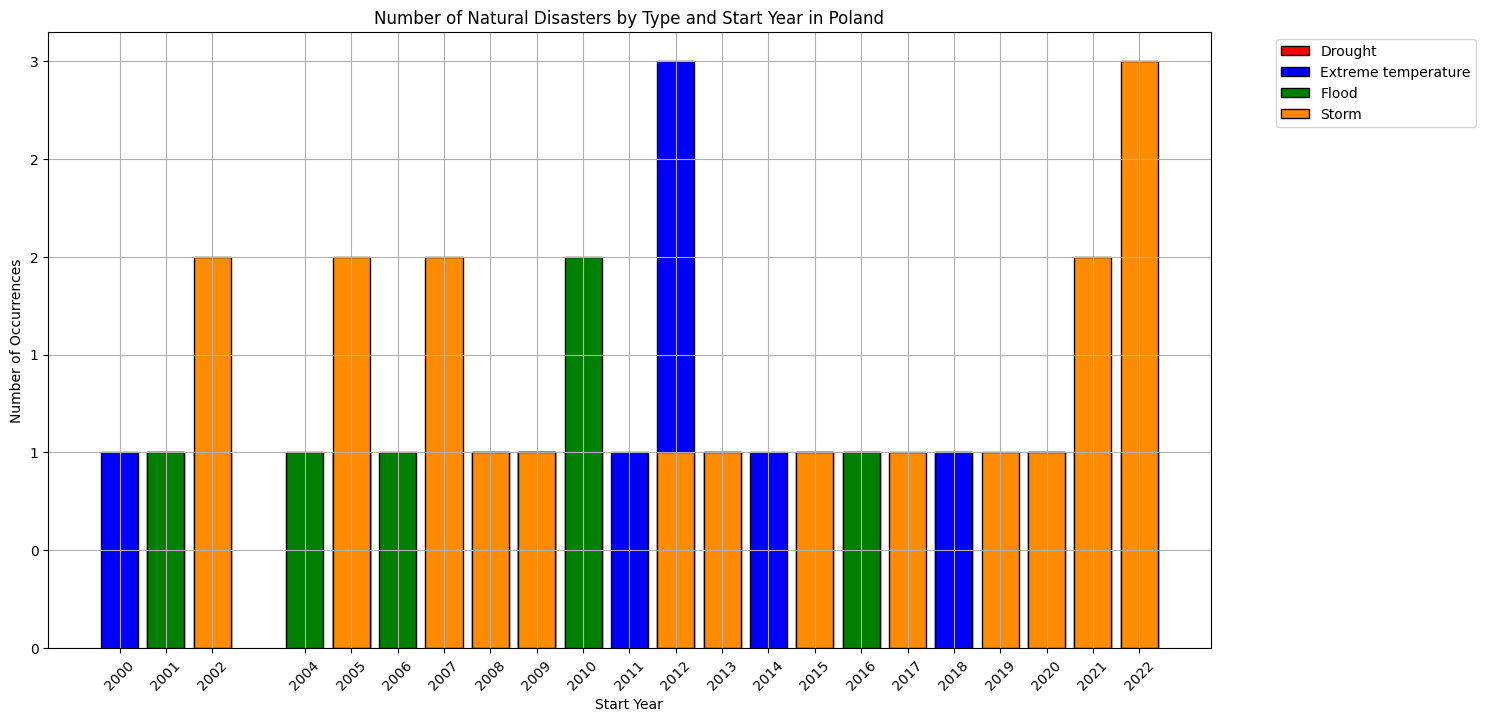

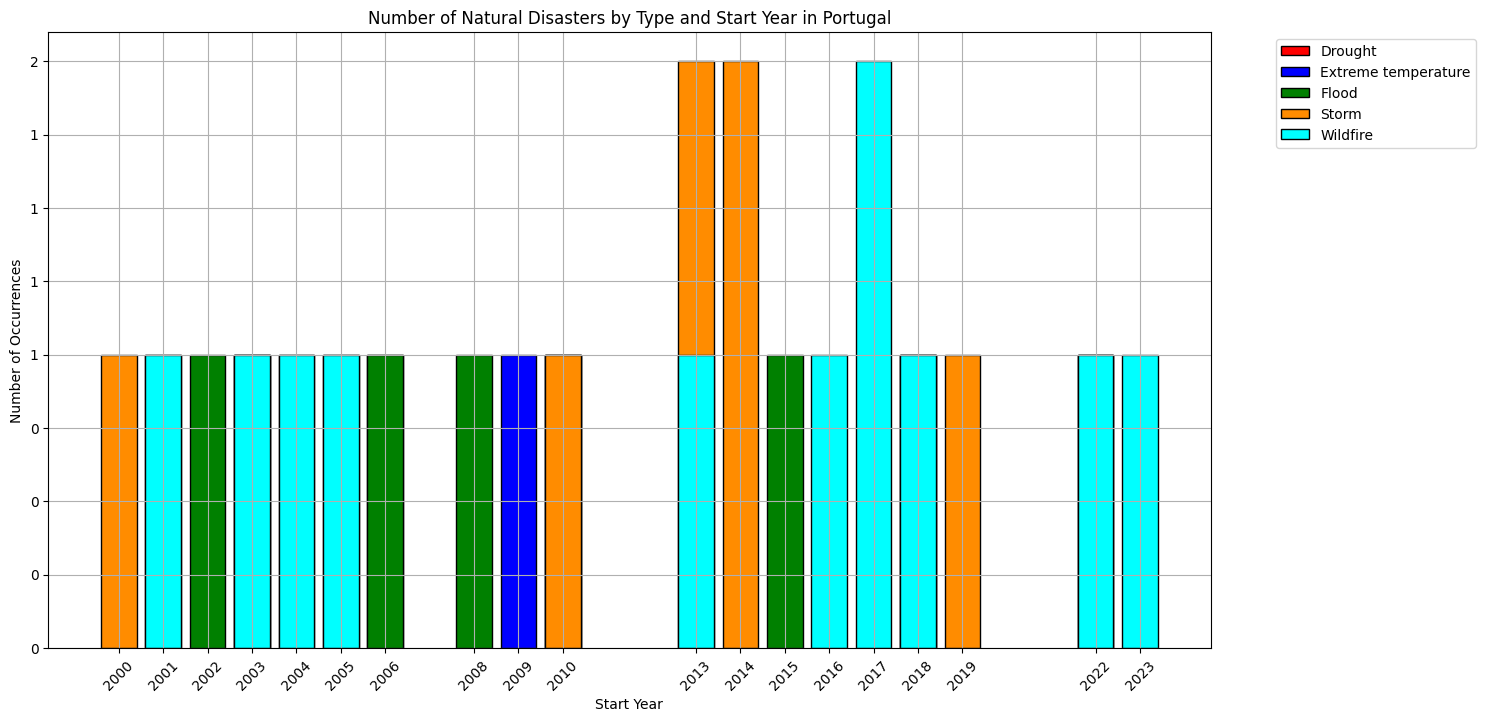

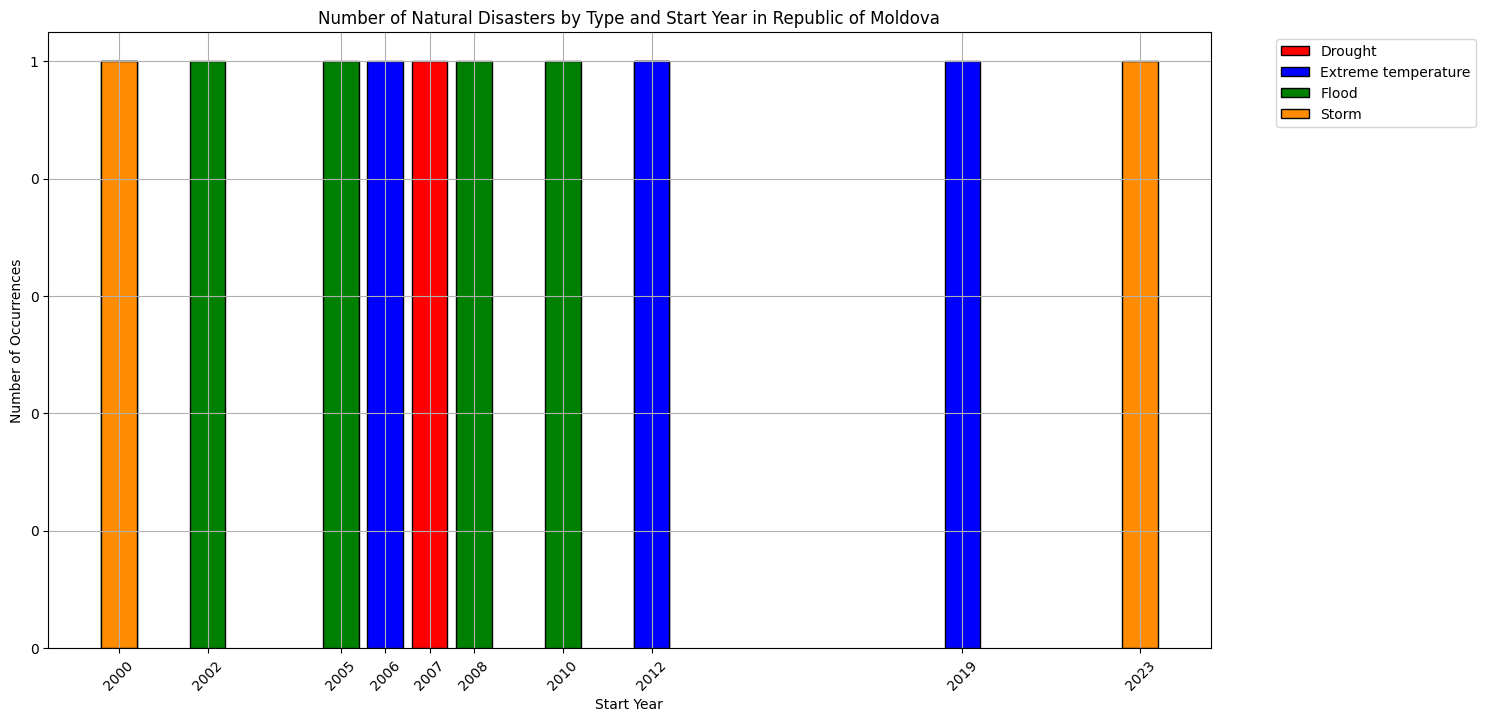

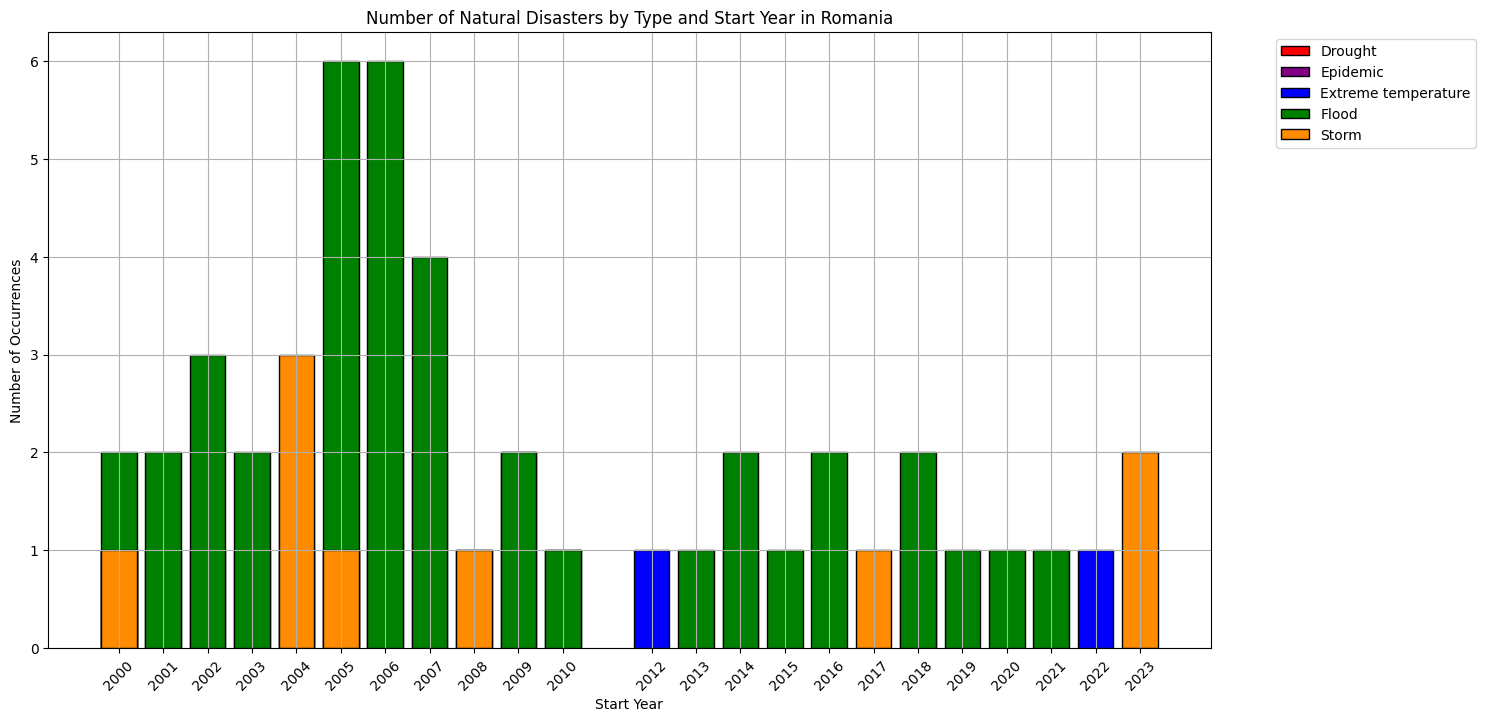

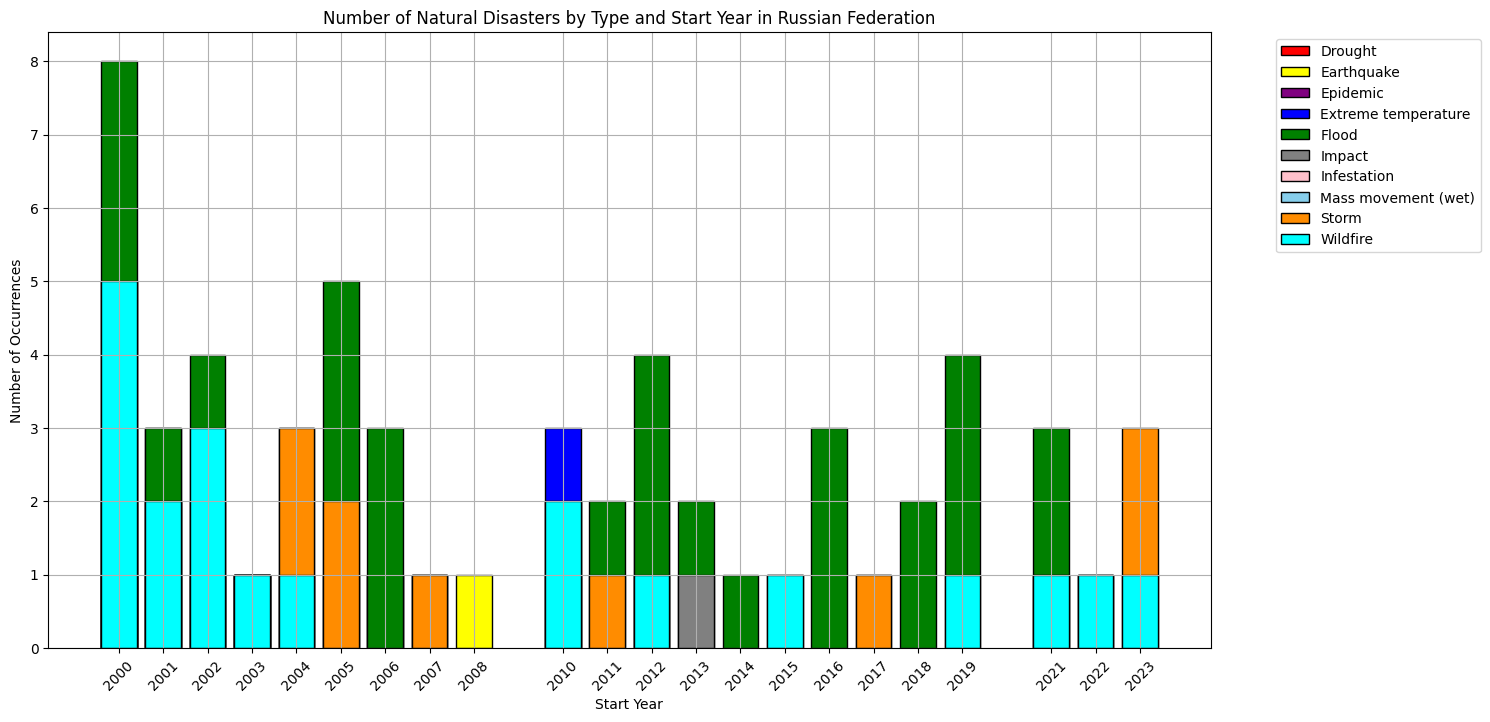

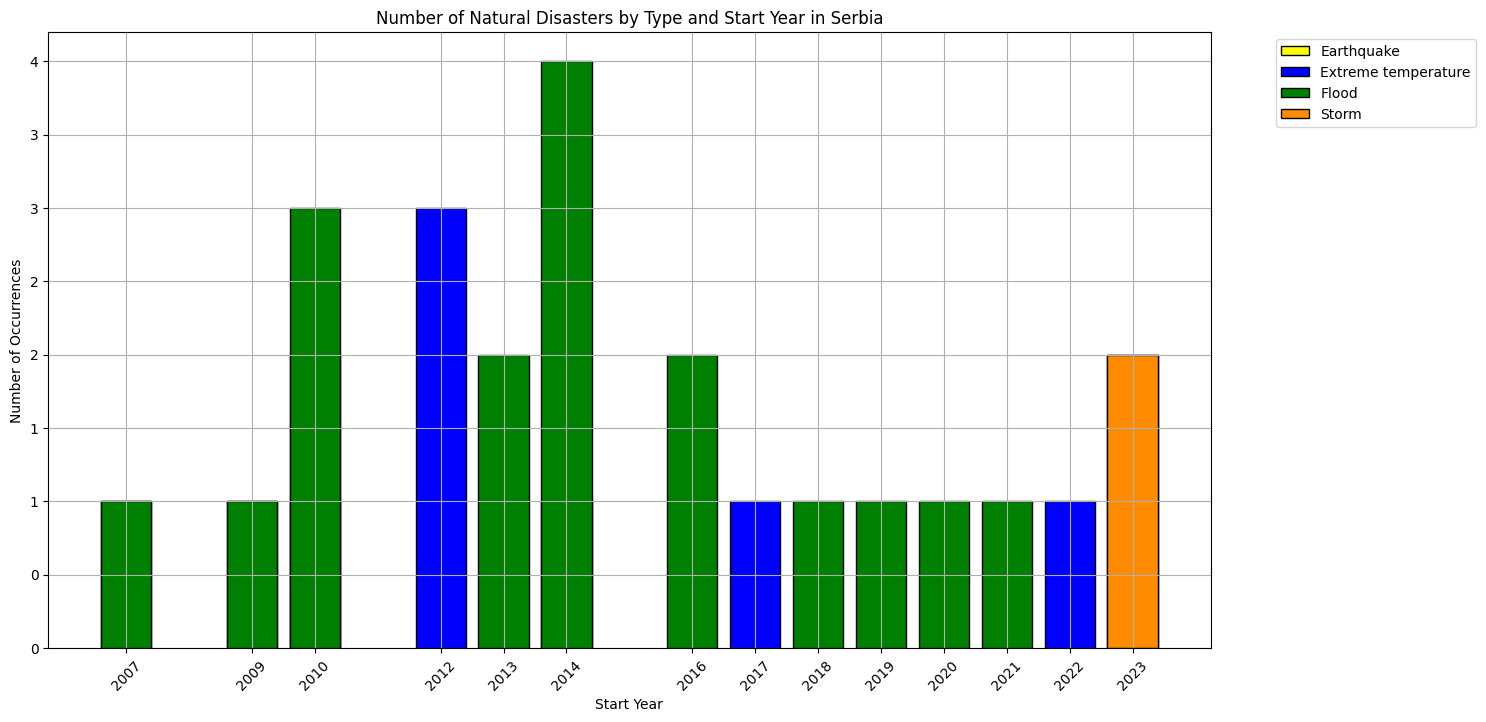

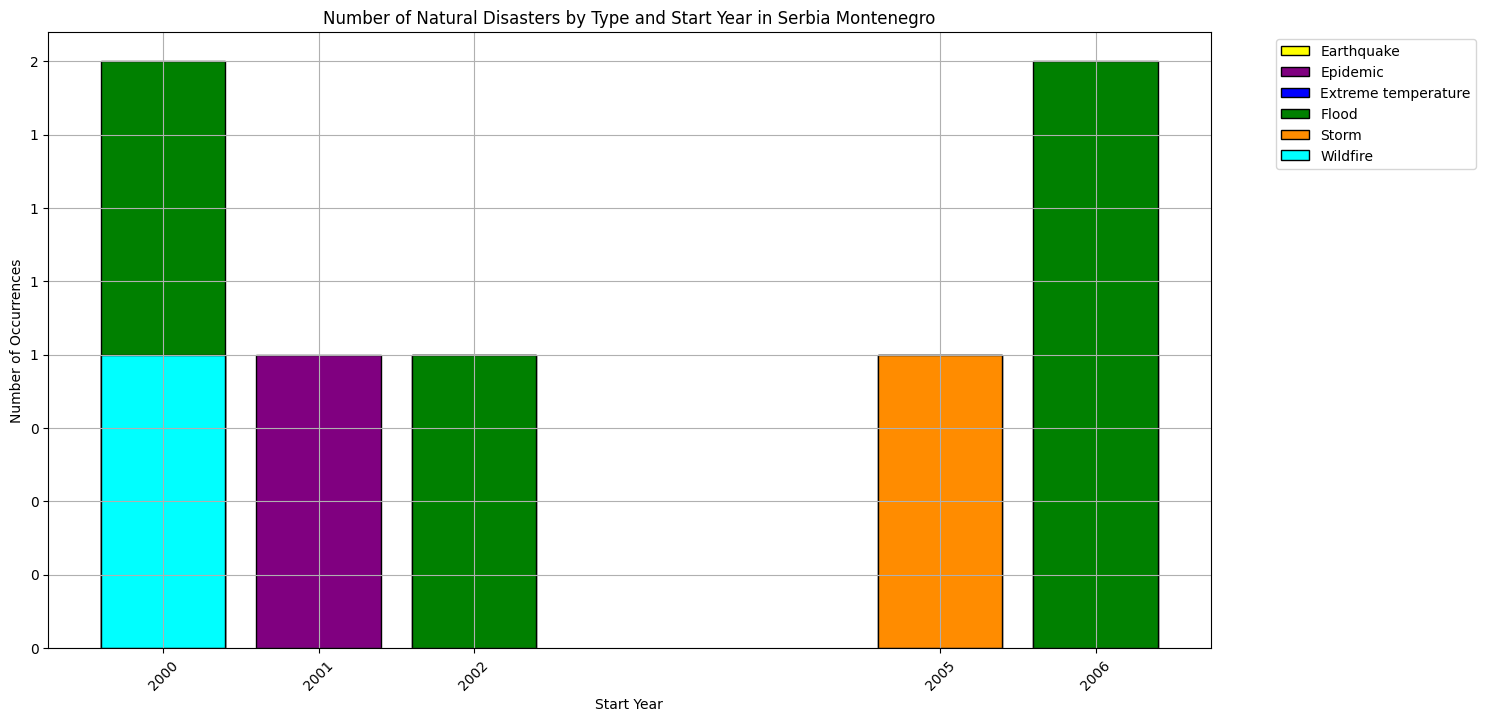

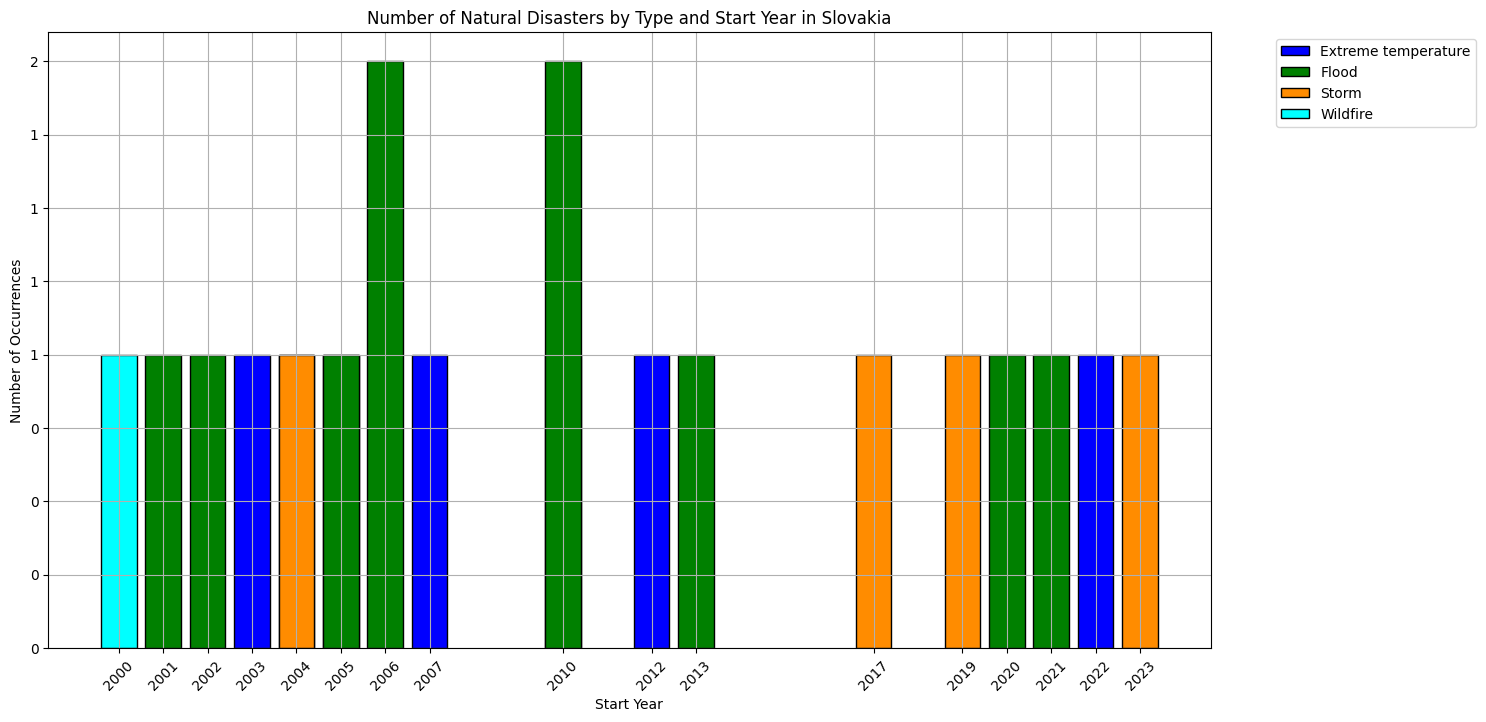

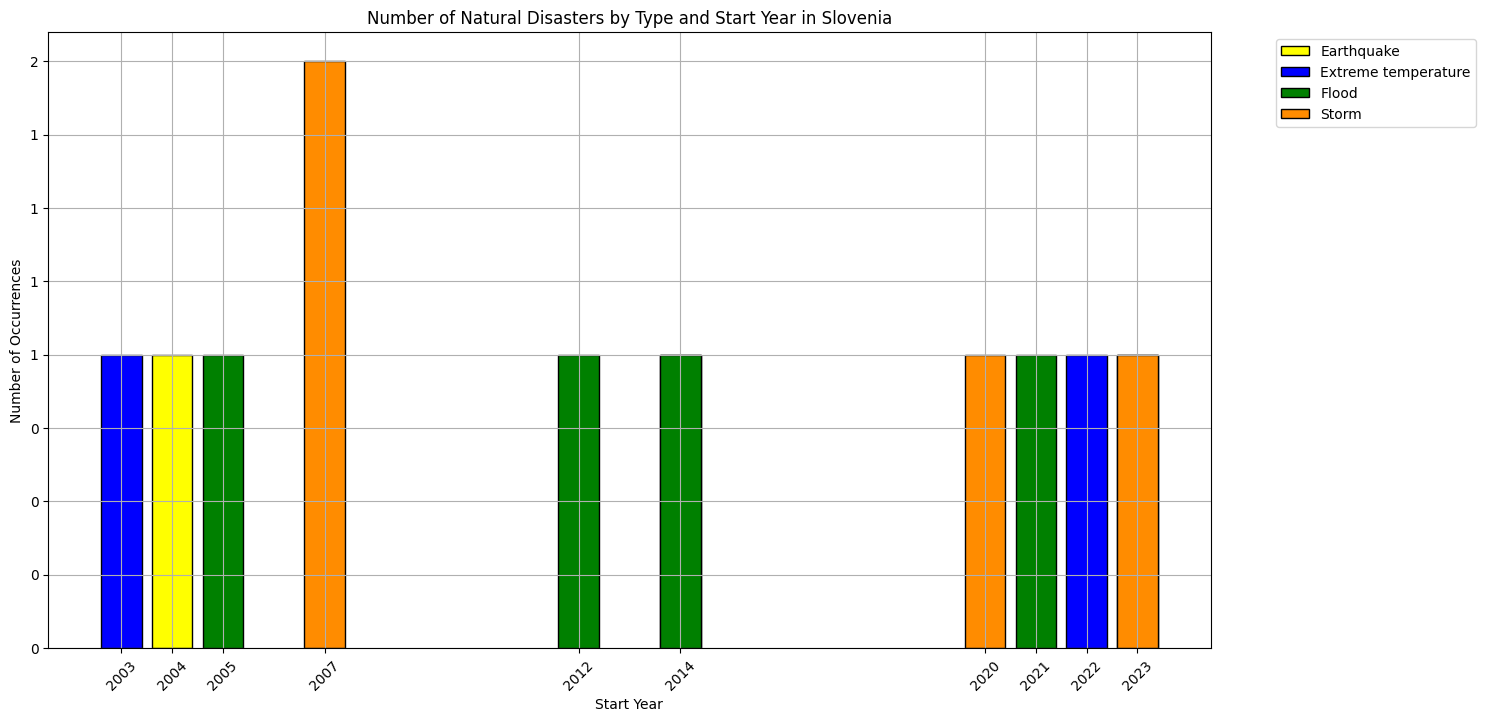

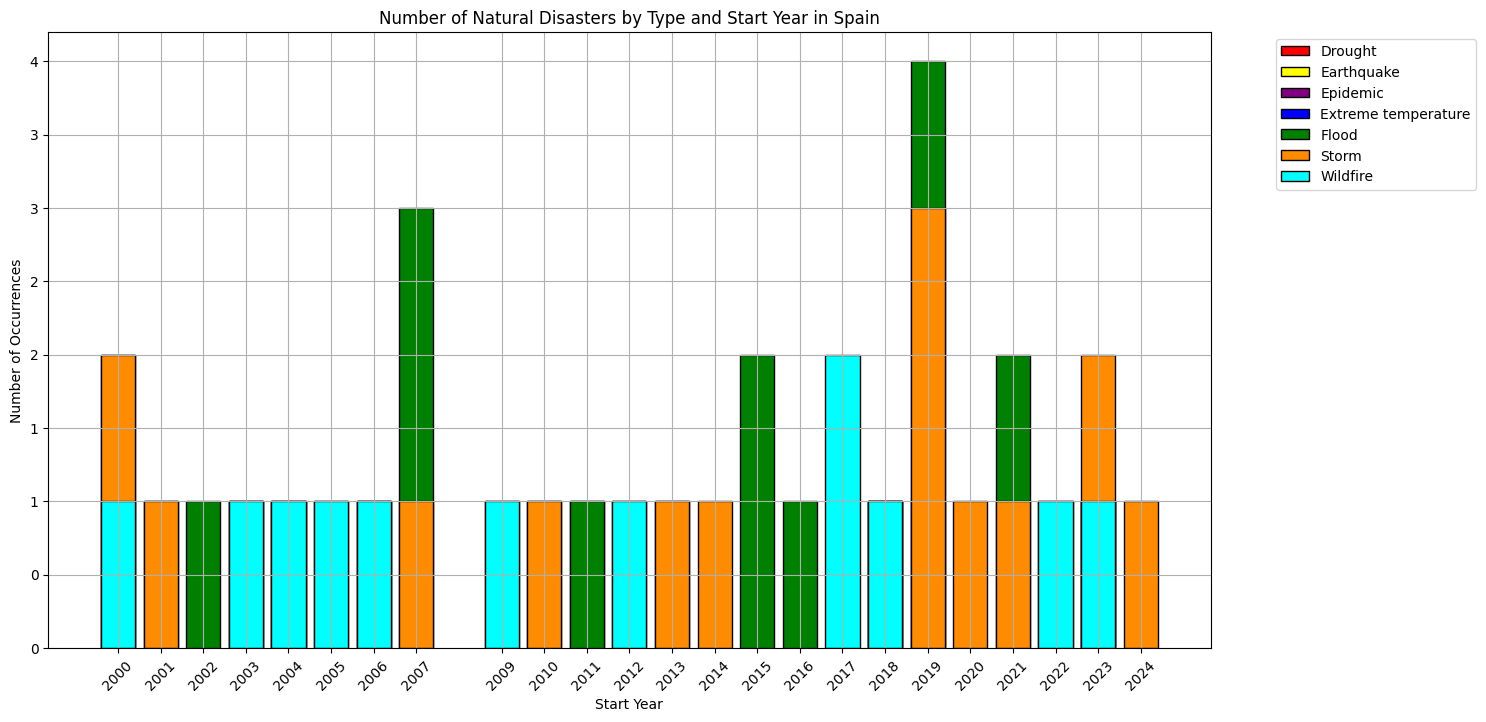

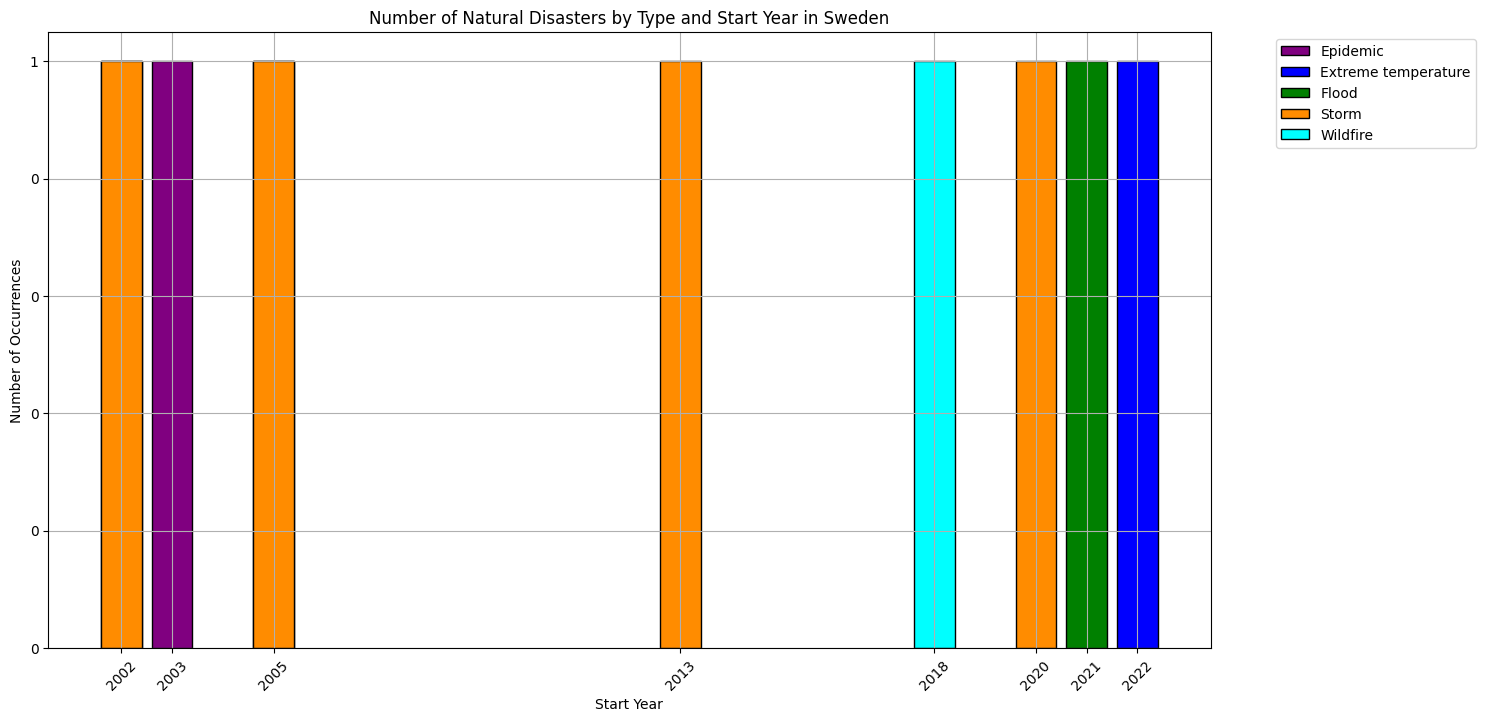

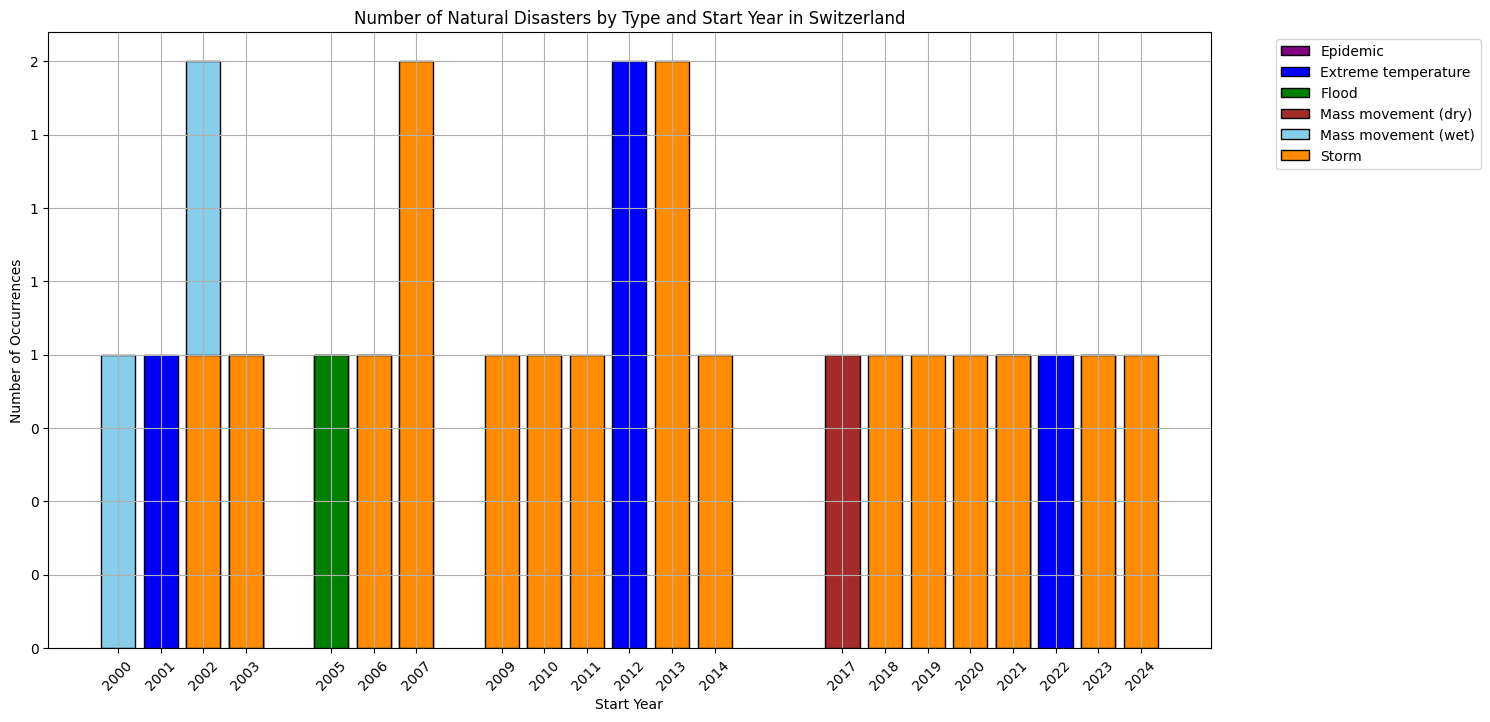

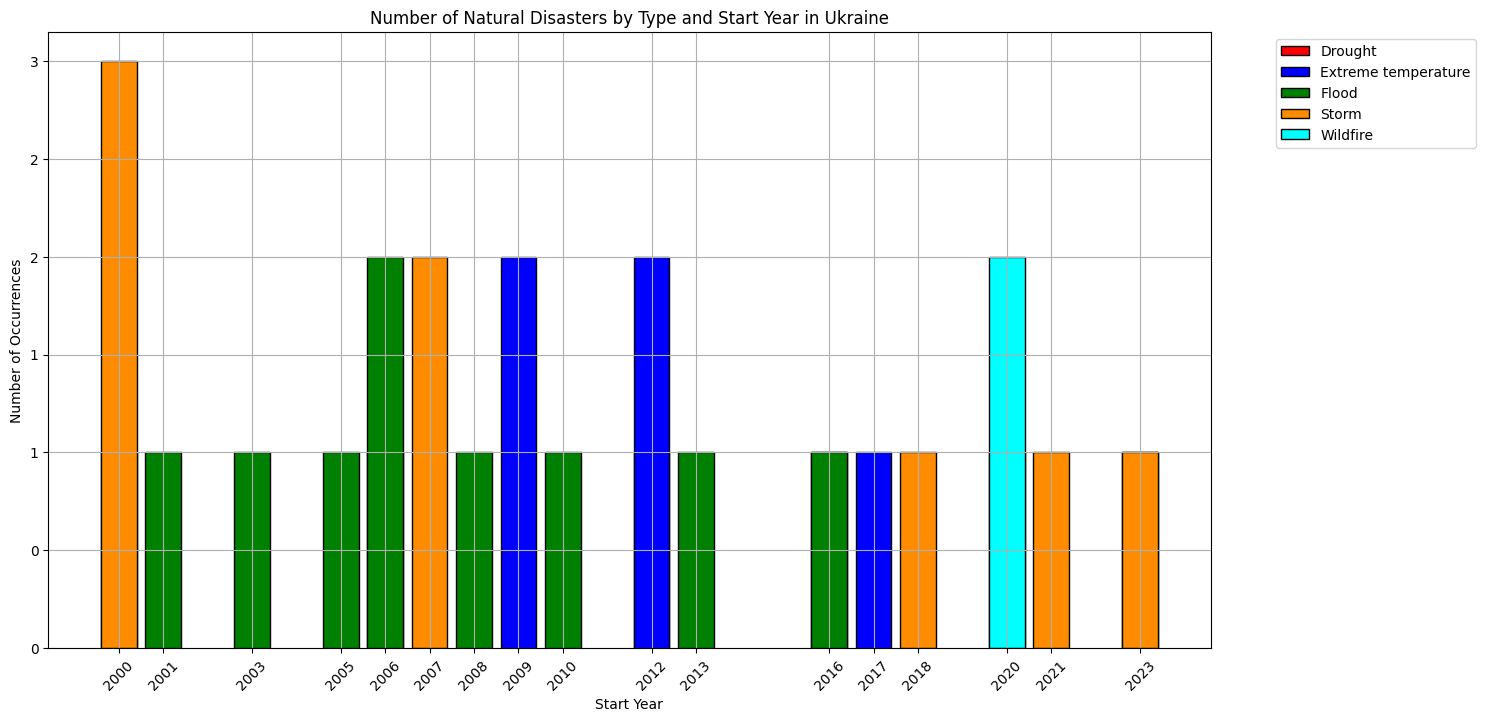

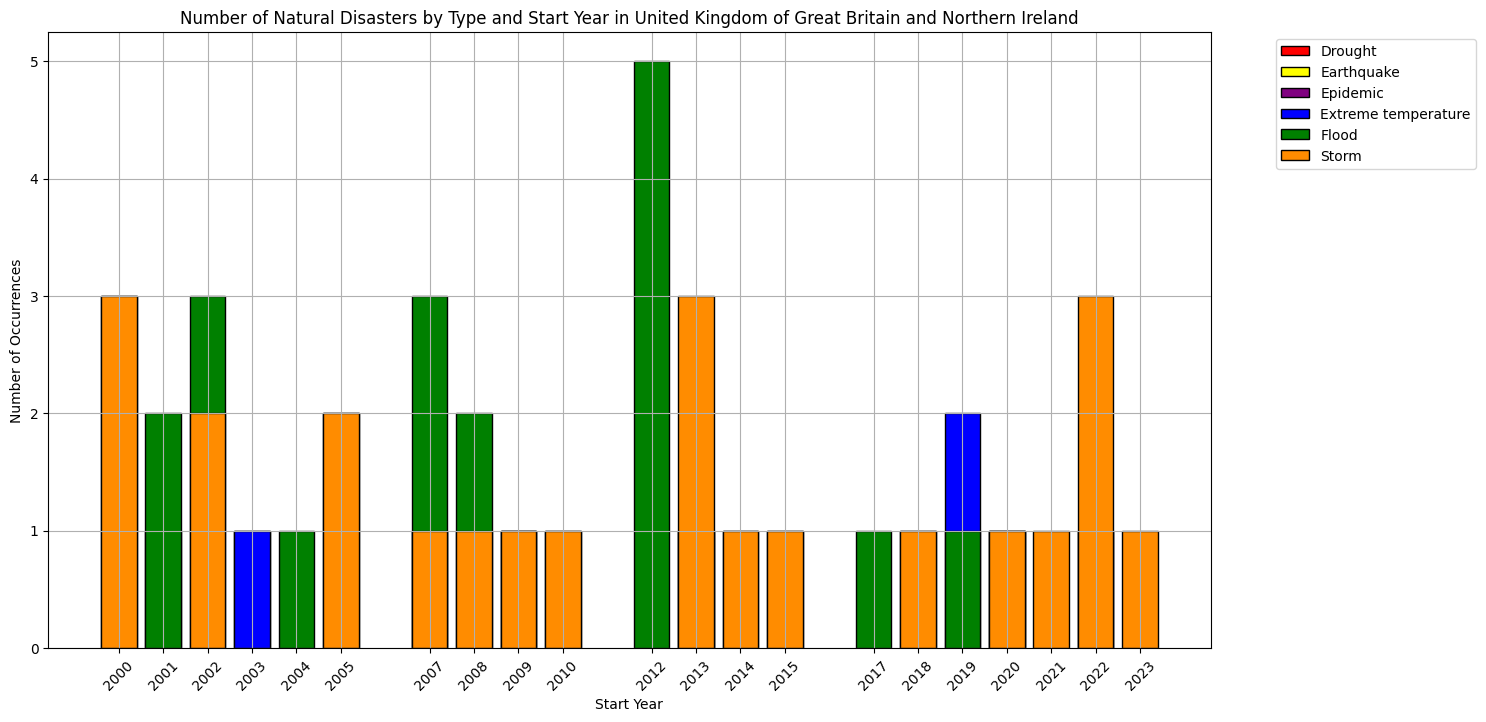

In [136]:
grouped = filter_natural.groupby(['Country', 'Start Year', 'Disaster Type']).size().unstack(fill_value=0)

countries = grouped.index.get_level_values('Country').unique()

####### TO SEE THE DATA ####### 
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# print(grouped)


for country in countries:
    country_data = grouped.loc[country]
    disaster_types = country_data.columns

    plt.figure(figsize=(15, 8))
    plotted_disaster_types = []  
    for i, disaster_type in enumerate(disaster_types):
        x = country_data.index[country_data[disaster_type] != 0]
        y = country_data[disaster_type][country_data[disaster_type] != 0]
        if y.sum() > 0: 
            bars = plt.bar(x, y, color=generic_colors[i], label=disaster_type, edgecolor='black')
            # for bar, year, count in zip(bars, x, y):
            #     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{disaster_type}, {year}: {count}', ha='center', va='bottom', rotation=45)
            plotted_disaster_types.append(disaster_type)
    plt.xlabel('Start Year')
    plt.ylabel('Number of Occurrences')
    plt.title(f'Number of Natural Disasters by Type and Start Year in {country}')
    plt.xticks(rotation=45, ticks=sorted(country_data.index.get_level_values('Start Year').unique()))   
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))  # Format y-axis as integers
    plt.show()
